# The Setup

## Spark Setup

In [1]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-8-jdk is already the newest version (8u252-b09-1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 109 not upgraded.
There are 2 choices for the alternative java (providing /usr/bin/java).

  Selection    Path                                            Priority   Status
------------------------------------------------------------
  0            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      auto mode
  1            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      manual mode
* 2            /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java   1081      manual mode

Press <enter> to keep the current choice[*], or type selection number: 


Let's setup Spark

In [0]:
%%capture

!apt install libkrb5-dev
!wget https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
! pip install pyspark --user
! pip install seaborn --user
! pip install plotly --user
! pip install imageio --user
! pip install folium --user

In [0]:
%%capture 
!apt update
!apt install gcc python-dev libkrb5-dev

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('545-Project').getOrCreate()

In [0]:
%load_ext sparkmagic.magics

In [0]:
#graph section
import networkx as nx
# SQLite RDBMS
import sqlite3
# Parallel processing
# import swifter

# NoSQL DB
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, OperationFailure

import os
os.environ['SPARK_HOME'] = '/content/spark-2.4.5-bin-hadoop2.7'
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import SQLContext

In [0]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)

## **Did not work:** EMR Spark

In [0]:
%%capture
!apt update
!apt install gcc python-dev libkrb5-dev
!pip install sparkmagic

In [0]:
%%capture
%load_ext sparkmagic.magics 

In [0]:
# Enter your Master Public DNS with the proper formatting and host
# Connect to our instance

%spark add -s my_session1 -l python -u http://ec2-34-231-171-36.compute-1.amazonaws.com:8998

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1588448242113_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


In [0]:
#%spark delete -s my_session1

## The Libraries Setup

In [8]:
!pip install pandasql

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
import pandasql as ps #SQL on Pandas Dataframe
import re
from scipy.stats import pearsonr, spearmanr

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
path = '/content/drive/My Drive/545_project'

# Introduction

The Dataset I have chosen is a Kaggle dataset (https://www.kaggle.com/azathoth42/myanimelist#UserAnimeList.csv) of users from the website MyAnimeList and their Anime Lists. \\
Anime is a term used for a style of Japanese animation and MyAnimeList is a website that lets its users track, review and find anime.

Some Popular anime include Attack on Ttitan, Death Note and Pokemon

![Anime](https://www.denofgeek.com/wp-content/uploads/2016/03/best-anime-to-stream.jpg?resize=768%2C432)

## Background

I have personally been watching anime since I was a young boy and it is a well-known and popular medium worldwide. The Dataset I have chosen has three tables: Users, Anime and AnimeLists. \\
The Users table contains the users registered on the MyAnimeList website. \\
The Anime table contains the anime acknowledges by MyAnimeList. \\
The AnimeLists table joins the users and anime together and contains information of which anime each user has watched, or is watching or plans to watch. It also contains information about the score the user assigned, the number of episodes they watched, and more.\\

In my proposal, I stated that I wanted to do interesting analysis of this data. I had a few ideas I wanted to explore, specifically I wanted to see if there are any gender trends of note in anime viewership and I also wanted to build a recommendation system. \\
I have tried to achieve both of these to some effect, in addition to other additional models and analysis.

In [0]:
# %%spark

anime_df = pd.read_csv(path+'/anime_filtered.csv')

In [0]:
# %%spark

users_df = pd.read_csv(path+ '/users_filtered.csv')

In [0]:
# %%spark

lists_df = pd.read_csv(path+'/animelists_filtered.csv')

Let's take a look at the rows in these tables to see what the data looks like

In [14]:
# %%spark

anime_df.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [0]:
# %%spark

users_df.head()

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,gender,location,birth_date,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.31,Female,"Chennai, India",1990-04-29,2013-03-03,2014-02-04 01:32:00,7.43,0.0,3391.0
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,Female,Manila,1995-01-01,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0
2,Damonashu,37326,45,195,27,25,59,83.70,Male,"Detroit,Michigan",1991-08-01,2008-02-13,1900-03-24 12:48:00,6.15,6.0,4936.0
3,bskai,228342,25,414,2,5,11,167.16,Male,"Nayarit, Mexico",1990-12-14,2009-08-31,2014-05-12 16:35:00,8.27,1.0,10081.0
4,terune_uzumaki,327311,5,5,0,0,0,15.20,Female,"Malaysia, Kuantan",1998-08-24,2010-05-10,2012-10-18 19:06:00,9.70,6.0,920.0


In [0]:
# %%spark

lists_df.head()

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
7,Xinil,21,626,2003-09-21,0000-00-00,9,1,0.0,0,1387773184,"action, adventure, pirates, comedy"
10,L-LawlietDN,21,2,0000-00-00,0000-00-00,10,1,0.0,0,1193266761,"Adventure, Comedy"
72,MonkeyDLuffyGir,21,7,0000-00-00,0000-00-00,10,1,0.0,0,1195163153,"Shounen, Comedy, Adventure, Action"
74,OkazukiIchigo,21,13,0000-00-00,0000-00-00,8,1,0.0,0,1232364193,waiting to buy dvd
81,PvMVirus,21,736,2008-08-05,0000-00-00,8,1,0.0,0,1462590194,"Action, Adventure, Comedy, Drama, Fantasy, Sho..."


# Exploratory Data Analysis and Initial Cleaning

**Let's explore the data**
![Explore image](https://dawars.me/wp-content/uploads/2017/07/fma_ed_text.png)

## Initial Cleaning: Dropping NaNs

We want to drop the Access rank column from users_df because it is mostly NaNs and not informative

In [0]:
# %%spark

users_df = users_df.drop(columns='access_rank')

We can also drop Anime from our table with NaNs for Studio or Genres since we will need this information for our model \\
Similarly drop users with no gender since we will use this in our analysis later

In [0]:
# %%spark

anime_df = anime_df.dropna(subset=['studio', 'genre'])
users_df = users_df.dropna(subset=['gender'])

## Summary Statistics

Let's see some summary statistics for our tables

In [16]:
# %%spark

anime_df.describe()

,anime_id,episodes,score,scored_by,rank,popularity,members,favorites
count,8532.000000,8532.000000,8532.000000,8.532000e+03,8004.000000,8532.000000,8.532000e+03,8532.000000
mean,14833.458861,14.119550,6.625357,1.910802e+04,4846.535857,5244.174871,3.803407e+04,525.859822
std,12782.086179,44.880064,1.270885,5.485626e+04,3340.441938,3687.272355,9.476323e+04,3390.770101
min,1.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,9.000000e+00,0.000000
25%,2894.250000,1.000000,6.190000,2.860000e+02,2076.750000,2148.250000,1.181750e+03,1.000000
50%,10371.000000,3.000000,6.780000,2.156000e+03,4356.000000,4503.500000,6.092500e+03,11.000000
75%,28149.500000,13.000000,7.360000,1.286325e+04,7001.250000,7948.250000,2.921250e+04,81.000000
max,37916.000000,1818.000000,9.520000,1.009477e+06,12919.000000,14486.000000,1.456378e+06,106895.000000


These summary statistics show that we still have a good number of anime after cleaning. The values in all the fields are quite informative and might be useful when we build our model later

In [0]:
# %%spark

users_df.describe()

,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,stats_mean_score,stats_rewatched,stats_episodes
count,1.161330e+05,116133.000000,116133.000000,116133.000000,116133.000000,116133.000000,1.161330e+05,116133.000000,116133.000000,1.161330e+05
mean,1.810832e+06,14.610283,195.498807,11.338018,11.818518,74.936332,9.329691e+01,7.713389,13.991079,6.611762e+03
std,1.996139e+06,32.459424,256.533148,31.622640,31.117077,177.889249,7.636053e+03,1.538595,54.731186,7.155270e+05
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.990980e+05,3.000000,47.000000,0.000000,0.000000,5.000000,2.246000e+01,7.310000,0.000000,1.349000e+03
50%,5.615770e+05,7.000000,121.000000,4.000000,3.000000,27.000000,4.990000e+01,7.880000,1.000000,3.017000e+03
75%,3.464591e+06,16.000000,253.000000,12.000000,12.000000,80.000000,9.277000e+01,8.460000,10.000000,5.642000e+03
max,7.251737e+06,2934.000000,11536.000000,2562.000000,2457.000000,12051.000000,2.601351e+06,10.000000,9404.000000,2.437949e+08


While most values seem okay in these statistics, the max value for user_watching is definitely concerning. There is a large gap between the 75% and max value and 2934 is not a reasonable number of shows that a user could be currently watching. \\

We certainly need to do some cleaning to get rid of these values. We can say that realistically a user can maybe concurrently watch less than 50 shows. \\

To match these, we will also filter out users whose total number of episodes is too high or total days spent watching is too high

In [0]:
# %%spark

users_df = users_df[users_df['user_watching'] < 50]

In [0]:
users_df = users_df[users_df['stats_episodes'] < 200000]
users_df = users_df[users_df['user_days_spent_watching'] < 2000]

In [17]:
# %%spark

users_df.describe()

,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,access_rank,stats_mean_score,stats_rewatched,stats_episodes
count,1.103360e+05,110336.000000,110336.000000,110336.000000,110336.000000,110336.000000,110336.000000,0.0,110336.000000,110336.000000,110336.000000
mean,1.810454e+06,10.032619,183.141078,10.331043,11.393852,67.057144,65.801488,NaN,7.711487,13.234511,4137.698920
std,1.999783e+06,10.061129,232.424560,26.820793,29.877900,154.023685,69.834551,NaN,1.546653,43.119947,5658.196822
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000
25%,1.987648e+05,3.000000,44.000000,0.000000,0.000000,5.000000,21.400000,NaN,7.310000,0.000000,1285.000000
50%,5.566950e+05,7.000000,114.000000,3.000000,3.000000,24.500000,47.720000,NaN,7.880000,1.000000,2878.000000
75%,3.463658e+06,14.000000,238.000000,11.000000,11.000000,73.000000,88.512500,NaN,8.460000,10.000000,5384.000000
max,7.251737e+06,49.000000,10138.000000,2288.000000,2457.000000,11729.000000,1951.260000,NaN,10.000000,2524.000000,199473.000000


Much better! Now let's check anime watched by a particular user

In [0]:
# %%spark

lists_df[lists_df['username'] == 'Xinil'].merge(anime_df, left_on='anime_id', right_on='anime_id')

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,Xinil,21,626,2003-09-21,0000-00-00,9,1,0.0,0,1387773184,"action, adventure, pirates, comedy",One Piece,One Piece,ONE PIECE,OP,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Currently Airing,True,"Oct 20, 1999 to ?","{'from': '1999-10-20', 'to': None}",24 min.,PG-13 - Teens 13 or older,8.54,423868,91.0,35,720133,69760,Several anime-original arcs have been adapted ...,Fall 1999,Sundays at 09:30 (JST),"{'Adaptation': [{'mal_id': 13, 'type': 'manga'...","Fuji TV, TAP, Shueisha","Funimation, 4Kids Entertainment",Toei Animation,"Action, Adventure, Comedy, Super Power, Drama,...","['#01: ""We Are! (ウィーアー!)"" by Hiroshi Kitadani ...","['#01: ""memories"" by Maki Otsuki (eps 1-30)', ..."
1,Xinil,59,26,2002-12-26,2002-12-30,9,2,0.0,0,0,"ecchi, comedy",Chobits,Chobits,ちょびっツ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 3, 2002 to Sep 25, 2002","{'from': '2002-04-03', 'to': '2002-09-25'}",24 min. per ep.,PG-13 - Teens 13 or older,7.53,175388,1546.0,188,317641,3271,"The original episodes 9 and 18 are ""recap"" epi...",Spring 2002,Wednesdays at 02:20 (JST),"{'Adaptation': [{'mal_id': 107, 'type': 'manga...","TBS, Pioneer LDC","Funimation, Geneon Entertainment USA",Madhouse,"Sci-Fi, Comedy, Drama, Romance, Ecchi, Seinen","['""Let Me Be With You"" by ROUND TABLE feat. Ni...","['#1: ""Raison d&#039;Être"" by Rie Tanaka (eps ..."
2,Xinil,120,26,2002-04-02,2002-04-08,9,2,0.0,0,0,"drama, romance",Fruits Basket,Fruits Basket,フルーツバスケット,Furuba,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Jul 5, 2001 to Dec 27, 2001","{'from': '2001-07-05', 'to': '2001-12-27'}",24 min. per ep.,PG-13 - Teens 13 or older,7.77,167968,939.0,222,292572,7579,Fruits Basket won the 2001 Animage&#039;s Anim...,Summer 2001,Thursdays at 18:00 (JST),"{'Adaptation': [{'mal_id': 102, 'type': 'manga...","TV Tokyo, Nihon Ad Systems, King Records",Funimation,Studio Deen,"Slice of Life, Comedy, Drama, Romance, Fantasy...","['""For Fruits Basket (For フルーツバスケット)"" by Ritsu...","['#1: ""Chiisana Inori (小さな祈り)"" by Ritsuko Okaz..."
3,Xinil,210,161,2004-10-12,2004-11-09,7,2,0.0,0,0,comedy,Ranma ½,Ranma ½,らんま1/2,"Ranma 1/2, Ranma ½ Nettou Hen",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,161,Finished Airing,False,"Apr 15, 1989 to Sep 25, 1992","{'from': '1989-04-15', 'to': '1992-09-25'}",24 min. per ep.,R+ - Mild Nudity,7.85,59911,802.0,623,134537,2742,The 2011 live-action adaptation is produced by...,Spring 1989,Unknown,"{'Adaptation': [{'mal_id': 23, 'type': 'manga'...","Shogakukan Productions, Kitty Films, Fuji TV, ...",Viz Media,Studio Deen,"Slice of Life, Comedy, Martial Arts, Fantasy","['#1: ""Jaja Uma ni Sasenai de"" by Etsuko Nishi...","['#1: ""Platonic Tsuranuite"" by Kaori Sakagami ..."
4,Xinil,249,167,2004-02-12,2004-09-19,7,2,0.0,0,0,monsters,InuYasha,InuYasha,犬夜叉,Inu Yasha,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,167,Finished Airing,False,"Oct 16, 2000 to Sep 13, 2004","{'from': '2000-10-16', 'to': '2004-09-13'}",24 min. per ep.,PG-13 - Teens 13 or older,7.90,181978,697.0,141,371313,12282,The anime won the &ldquo;Property of the Year&...,Fall 2000,Mondays at 19:00 (JST),"{'Adaptation': [{'mal_id': 676, 'type': 'manga...","Yomiuri Telecasting, Shogakukan",Viz Media,Sunrise,"Action, Adventure, Comedy, Historical, Demons,...","['#1: ""Change the World"" by V6 (eps 01-34)', '...","['#1: ""My Will"" by Dream (eps 01-20,166-167)',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

## Distribution of Studios

Let us look at the distribution of works by studios and see how many shows a studio produces on average


In [0]:
# %%spark

studio_df = anime_df.groupby('studio').count()

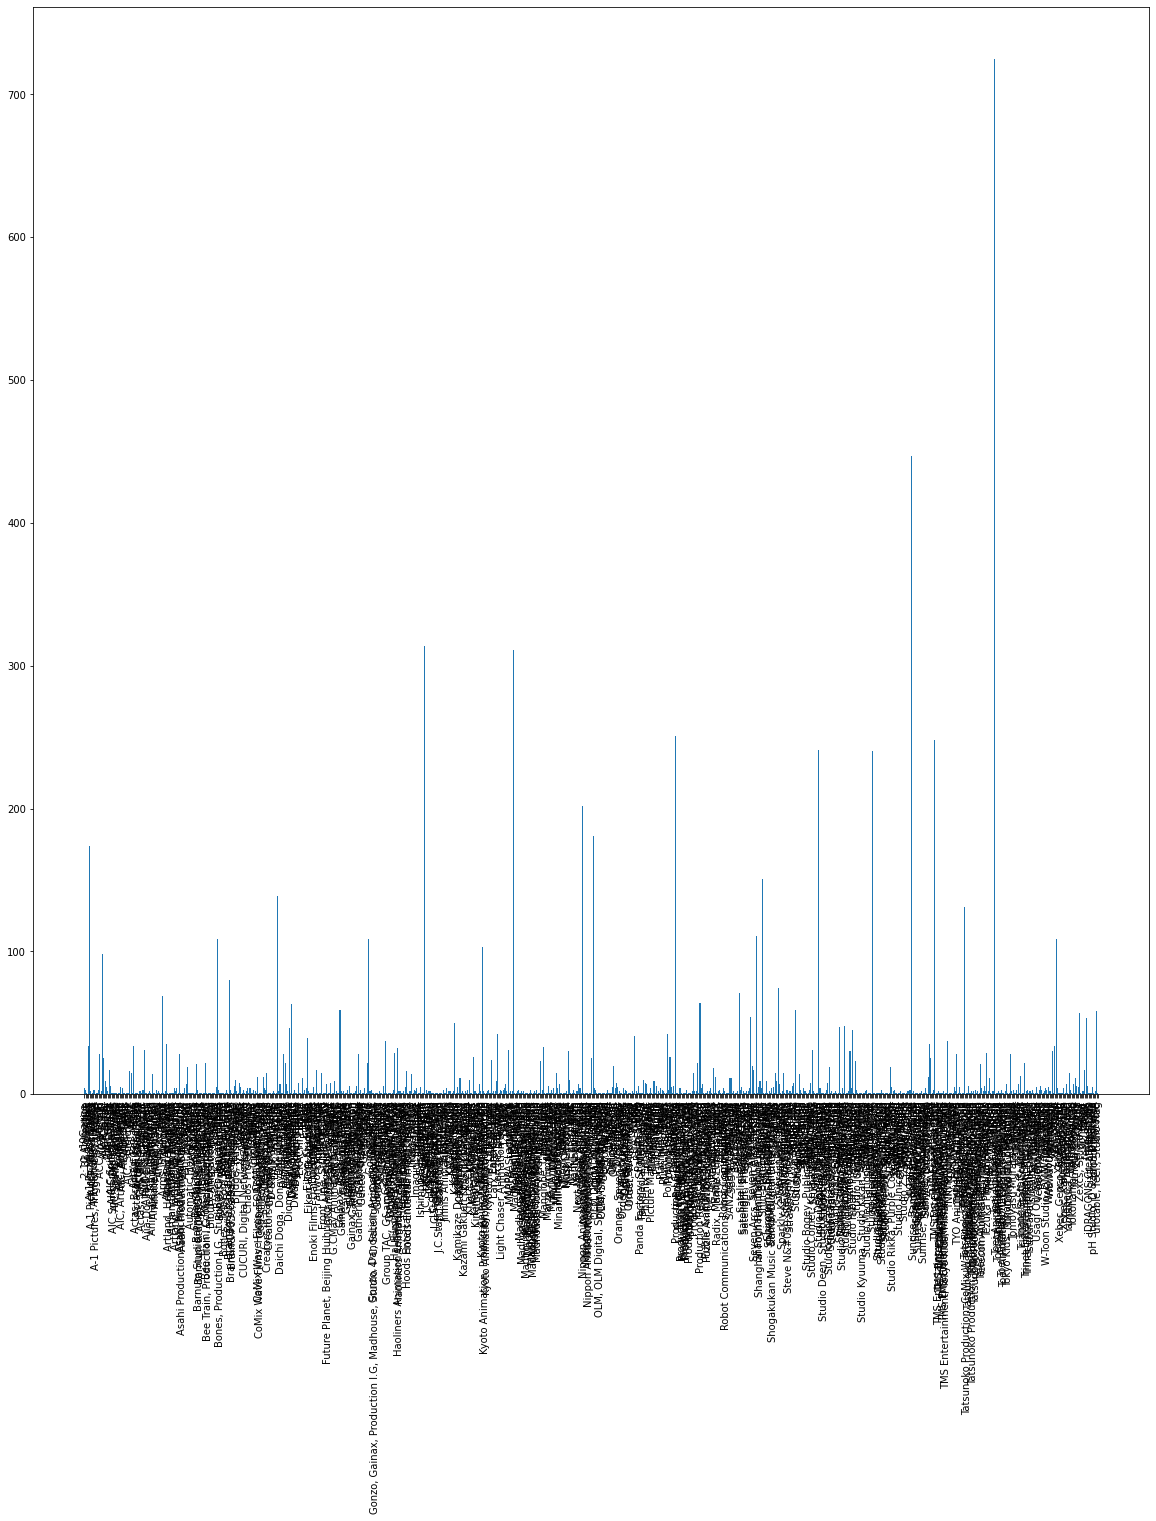

In [0]:
# %%spark

plt.figure(figsize=(20, 20))
plt.bar(studio_df.index, studio_df['anime_id'])
plt.xticks(studio_df.index, studio_df.index, rotation='vertical')
plt.show()

Wow that's a lot of studios! The x-axis labels are pretty much unreadable. Let's replot this with the biggest studios

In [0]:
# %%spark

big_studio_df = studio_df[studio_df['anime_id'] > 50]

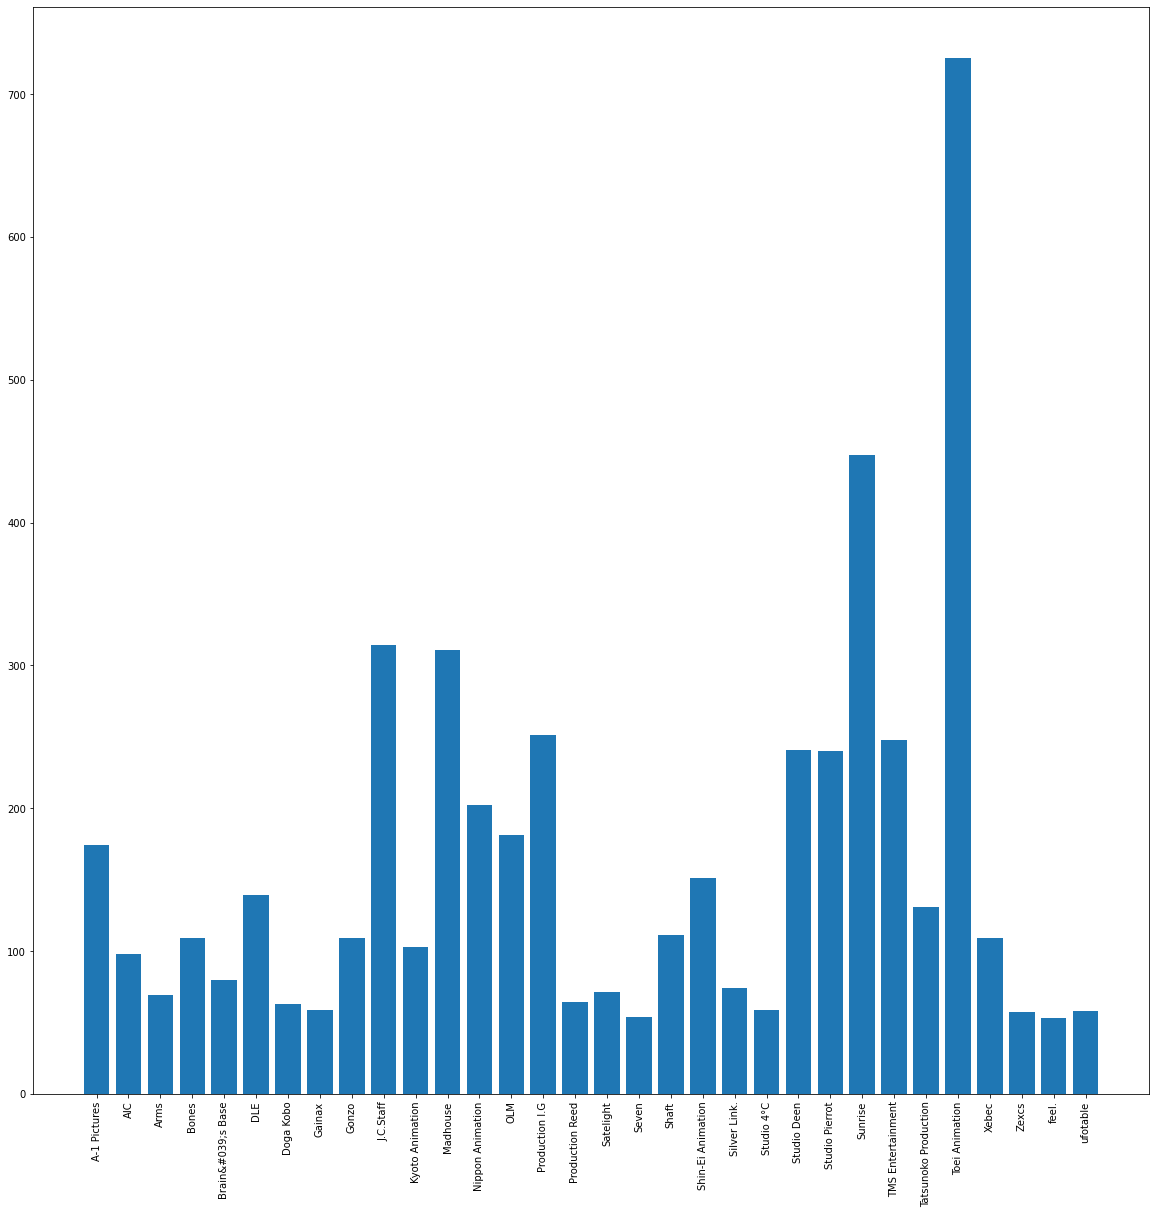

In [0]:
# %%spark

plt.figure(figsize=(20, 20))
plt.bar(big_studio_df.index, big_studio_df['anime_id'])
plt.xticks(big_studio_df.index, big_studio_df.index, rotation='vertical')
plt.show()

In [0]:
# %%spark

# Mean number of shows by each studio
studio_df['anime_id'].mean()

10.982005141388175

This tells us that there are some large studios with several hundred shows but most studio are small with only tens of shows. \\
Let us now try to a create a DF containing mappings from anime to their genres

## Distribution of Genres

In [0]:
# %%spark

show_list = []
genre_list = []
for i, row  in anime_df.iterrows():
  genres = row['genre'].split(',')
  genres = [i.strip() for i in genres]
  for genre in genres:
    show_list.append(row['anime_id'])
    genre_list.append(genre)

In [0]:
# %%spark

genre_df = pd.DataFrame({'anime_id':show_list, 'genre':genre_list})

How many genres are there in  total?

In [26]:
# %%spark

len(set(genre_df['genre']))

43

Let's make a plot to see all the shows grouped by genre

In [0]:
# %%spark

genre_count = genre_df.groupby('genre').count()

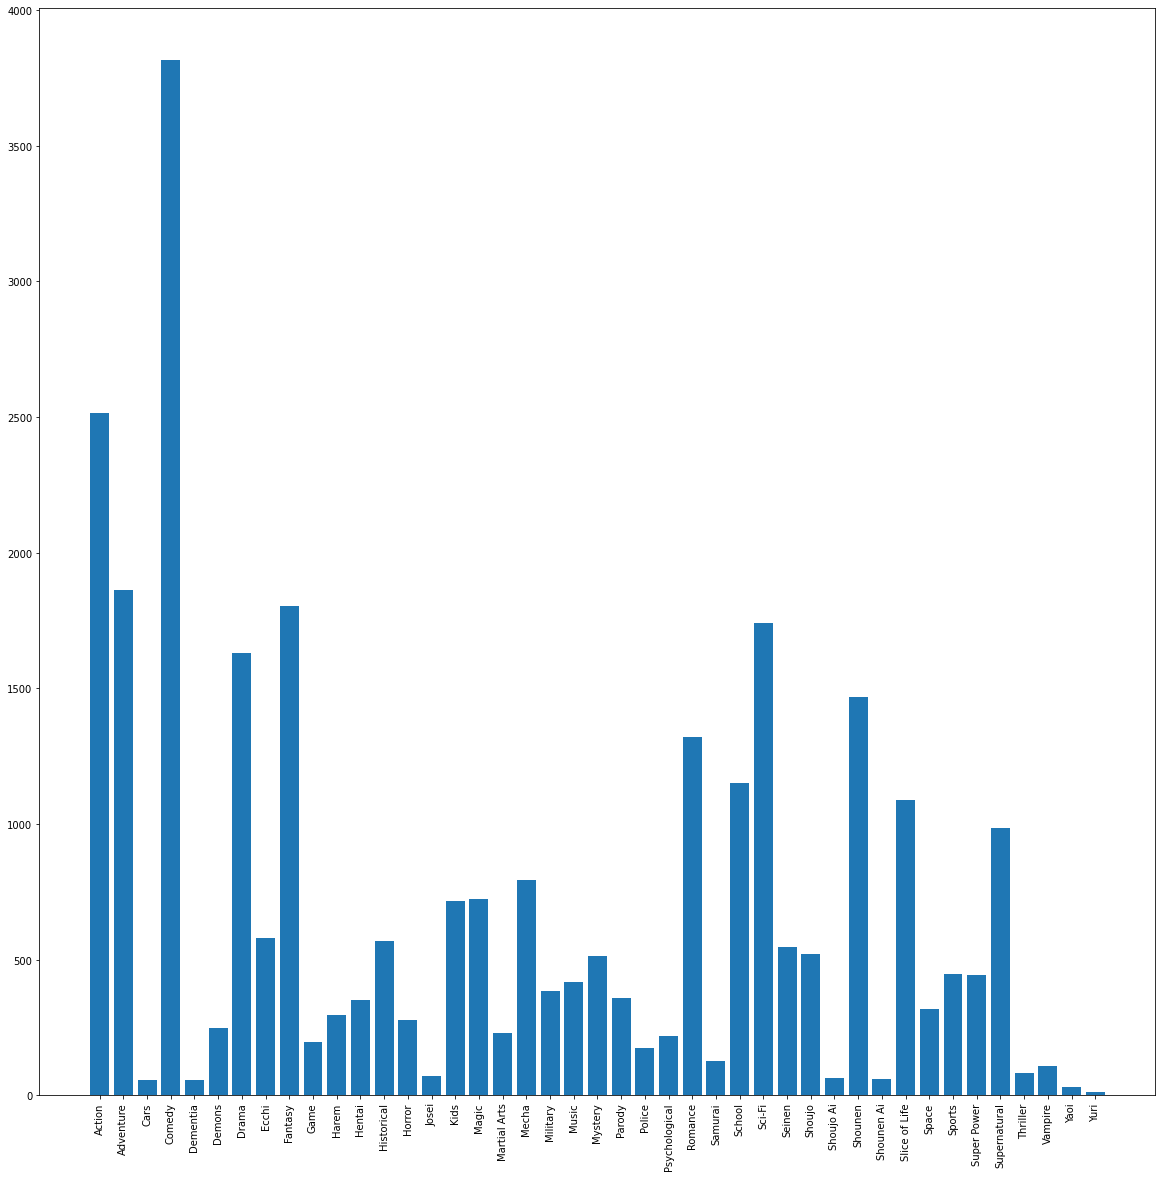

In [0]:
%%spark

plt.figure(figsize=(20, 20))
plt.bar(genre_count.index, genre_count['anime_id'])
plt.xticks(genre_count.index, genre_count.index, rotation='vertical')
plt.show()

Wow, it's pretty clear what the popular genres are. Action and Comedy clearly take the lead, with Fantasy and Romance close behind. \\
Other genres like Cars, Police and Music are more niche.

## Popularity & Rank Distributions

In [27]:
anime_df.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


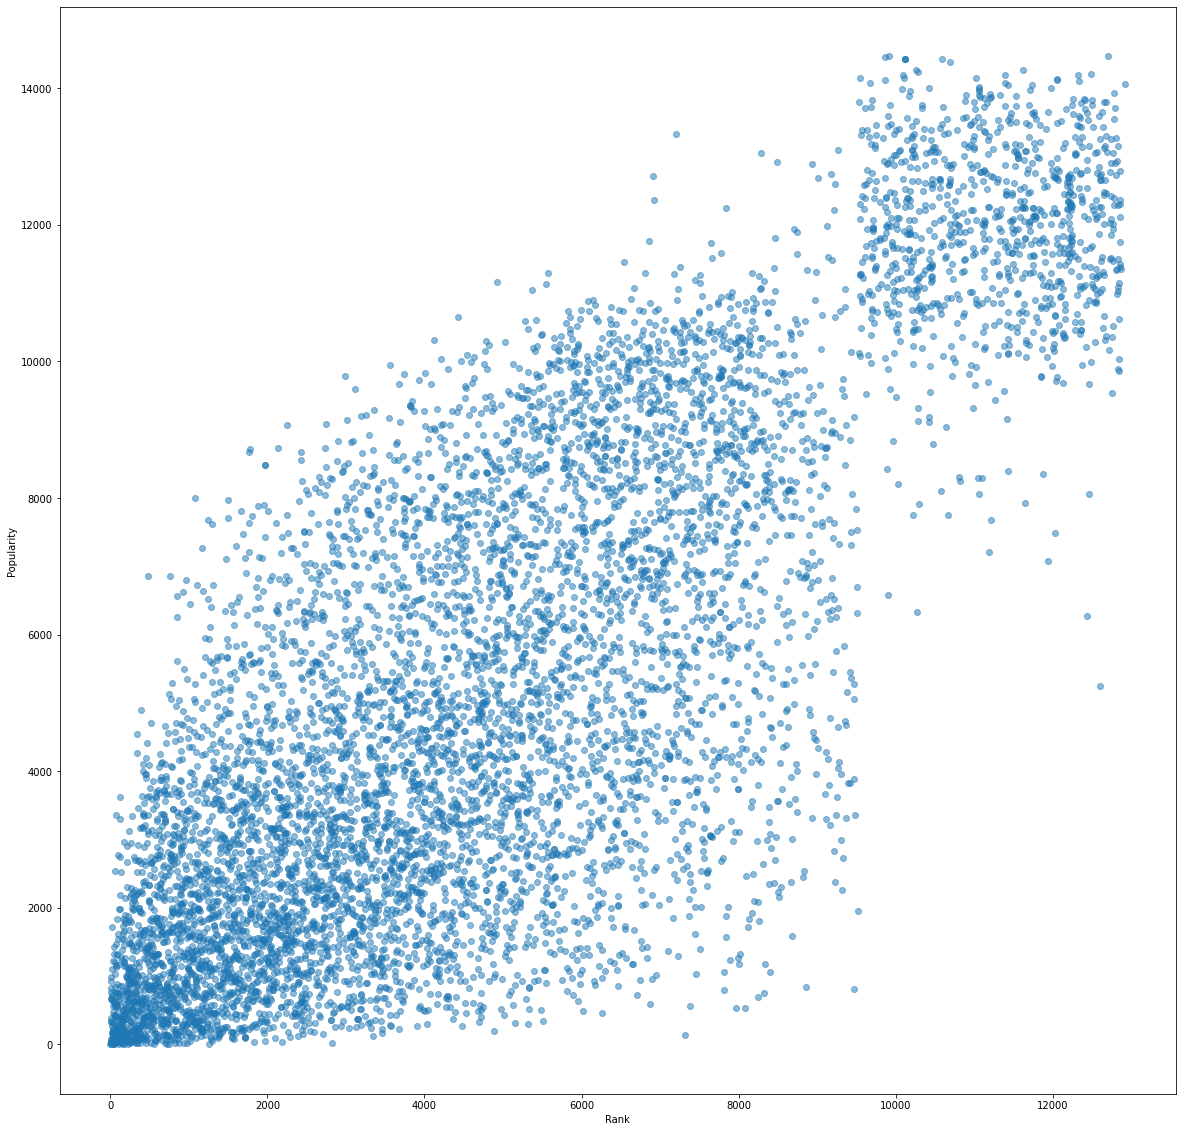

In [29]:
plt.figure(figsize=(20, 20))
plt.scatter(anime_df['rank'], anime_df['popularity'], alpha=0.5)
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.show()

From this plot we see that there doesn't seem to be a very high correlation between the rank and popularity although there is certainly a weak linear relationship for a large number of anime

Some interesting features to note from this plot are: \\
1. The points are highly concentrated in the top 1000 rank/popularity section and this might be worth looking at separately
2. There is a break around 10000 rank/popularity after which we see a small cluster of low rank & low popularity anime.

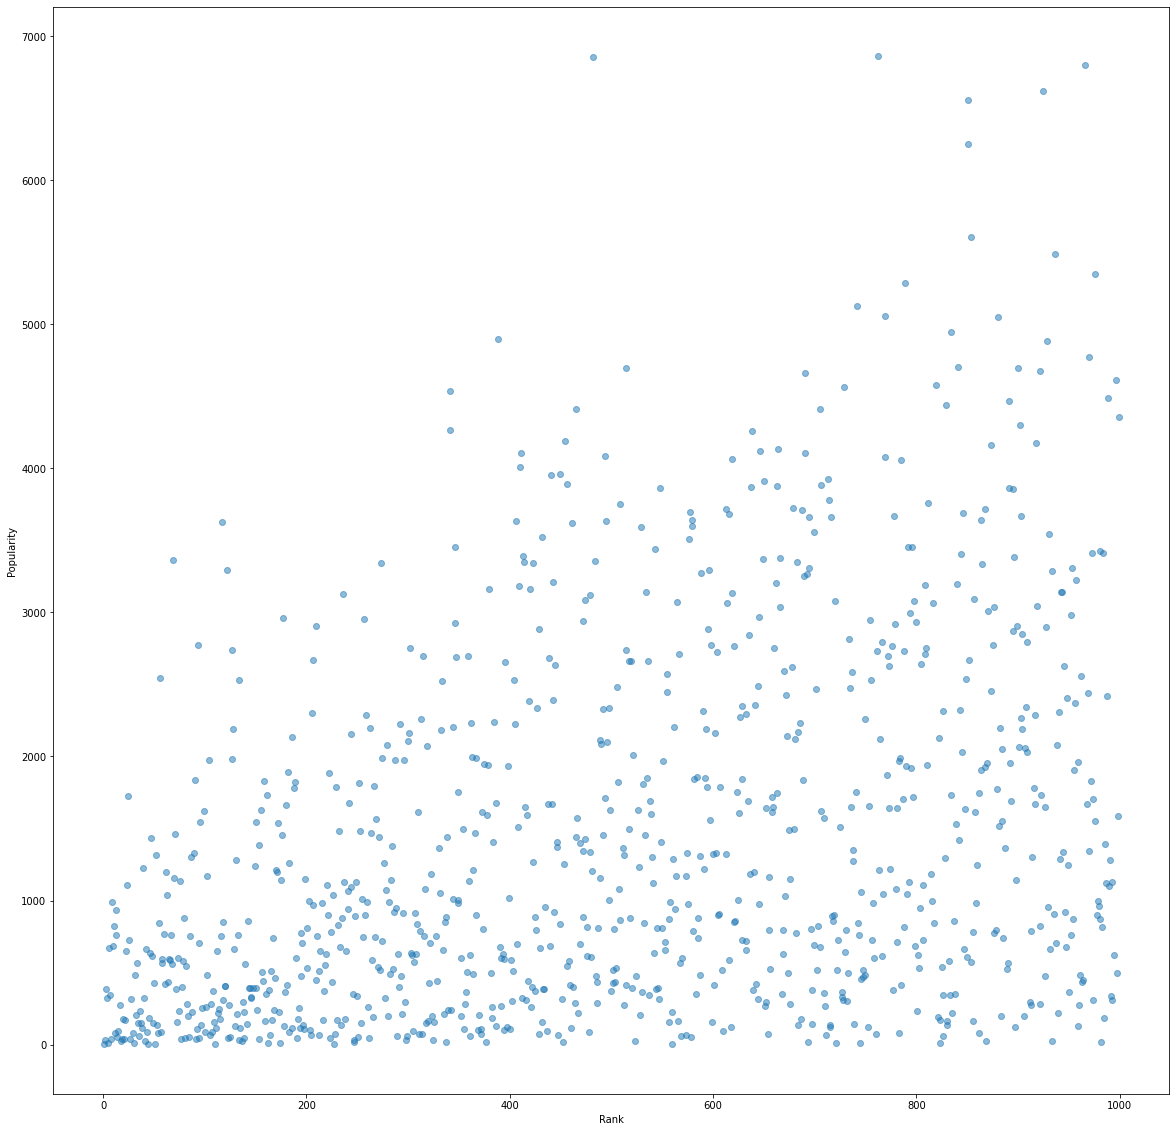

In [30]:
plt.figure(figsize=(20, 20))
high_ranked = anime_df[anime_df['rank'] < 1000]
plt.scatter(high_ranked['rank'], high_ranked['popularity'], alpha=0.5)
plt.xlabel('Rank')
plt.ylabel('Popularity')
plt.show()

Looking more closely at the top 1000 ranked anime, there doesn't seem to be a correlation between the rank and popularity. We calculate the Pearson's Correlation coefficient and Spearman's Correlation coefficient below, and this doesn't show a strong linear or non-linear correlation

In [33]:


pcorr, _ = pearsonr(high_ranked['rank'], high_ranked['popularity'])
scorr, _ = spearmanr(high_ranked['rank'], high_ranked['popularity'])
print("Pearson's Corr: {}".format(pcorr))
print("Spearman's Corr: {}".format(scorr))

Pearson's Corr: 0.3750777104098536
Spearman's Corr: 0.3847649115359068


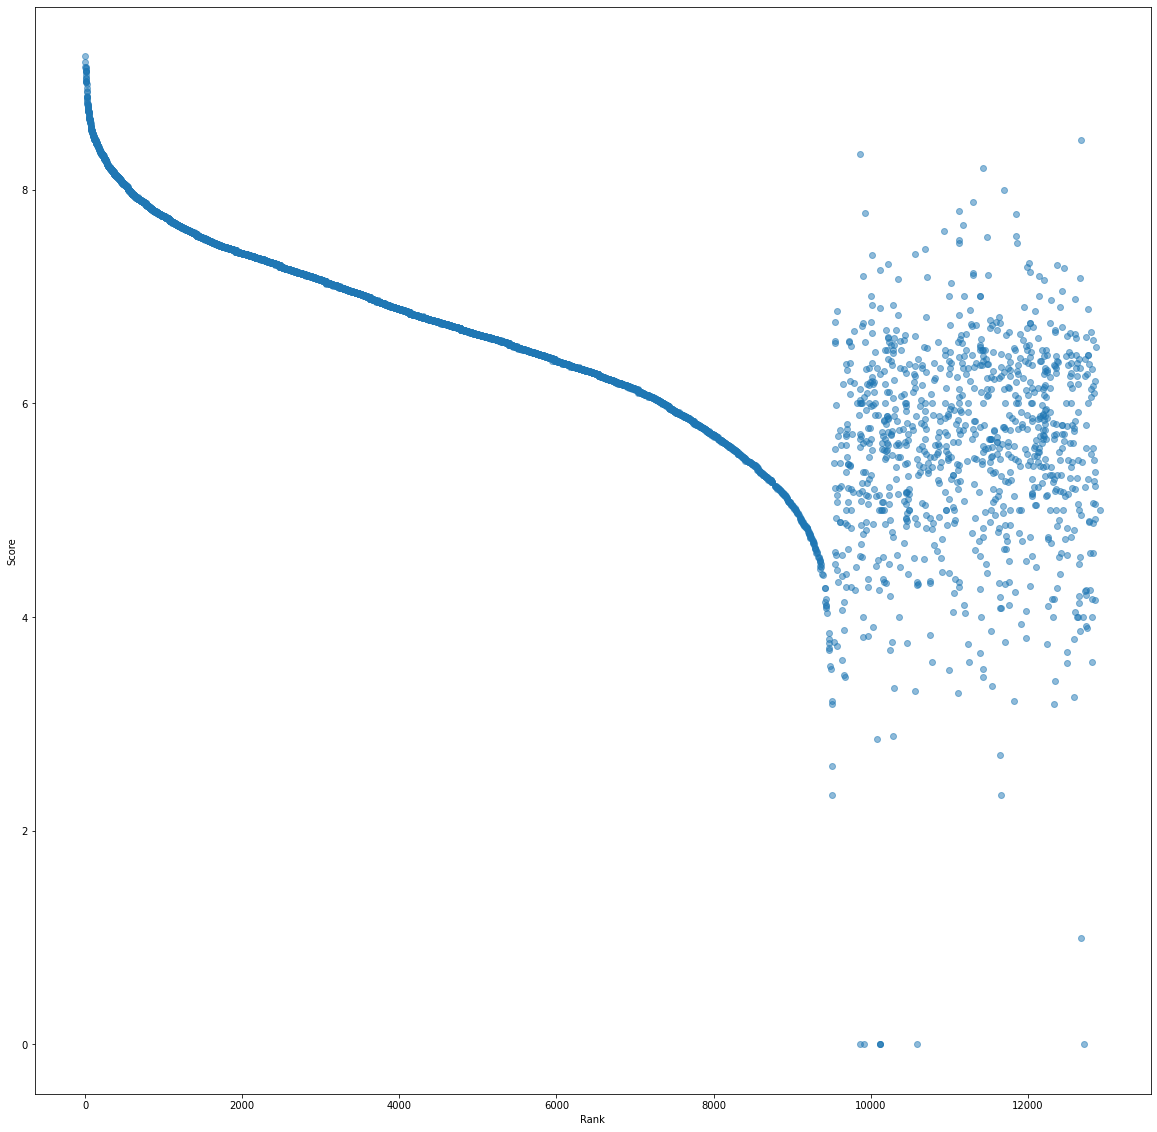

In [32]:
plt.figure(figsize=(20, 20))
plt.scatter(anime_df['rank'], anime_df['score'], alpha=0.5)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.show()

Now that's an interesting graph. There seems to be a (non-linear) correlation between the avg score given to an anime and its rank, at least till the rank reaches around 10000. After the rank reaches 10000, the ratings become very unpredictable.

In [0]:
clean_ranked = anime_df[anime_df['rank'] < 9000]

In [36]:
pcorr, _ = pearsonr(clean_ranked['rank'], clean_ranked['score'])
scorr, _ = spearmanr(clean_ranked['rank'], clean_ranked['score'])
print("Pearson's Corr: {}".format(pcorr))
print("Spearman's Corr: {}".format(scorr))

Pearson's Corr: -0.9853574724756352
Spearman's Corr: -0.9999899541455464


There's a clear strong negative correlation between these variables, and the non-linear correlation is almost 1!

Let's plot some more comparisons to find more relationships like this

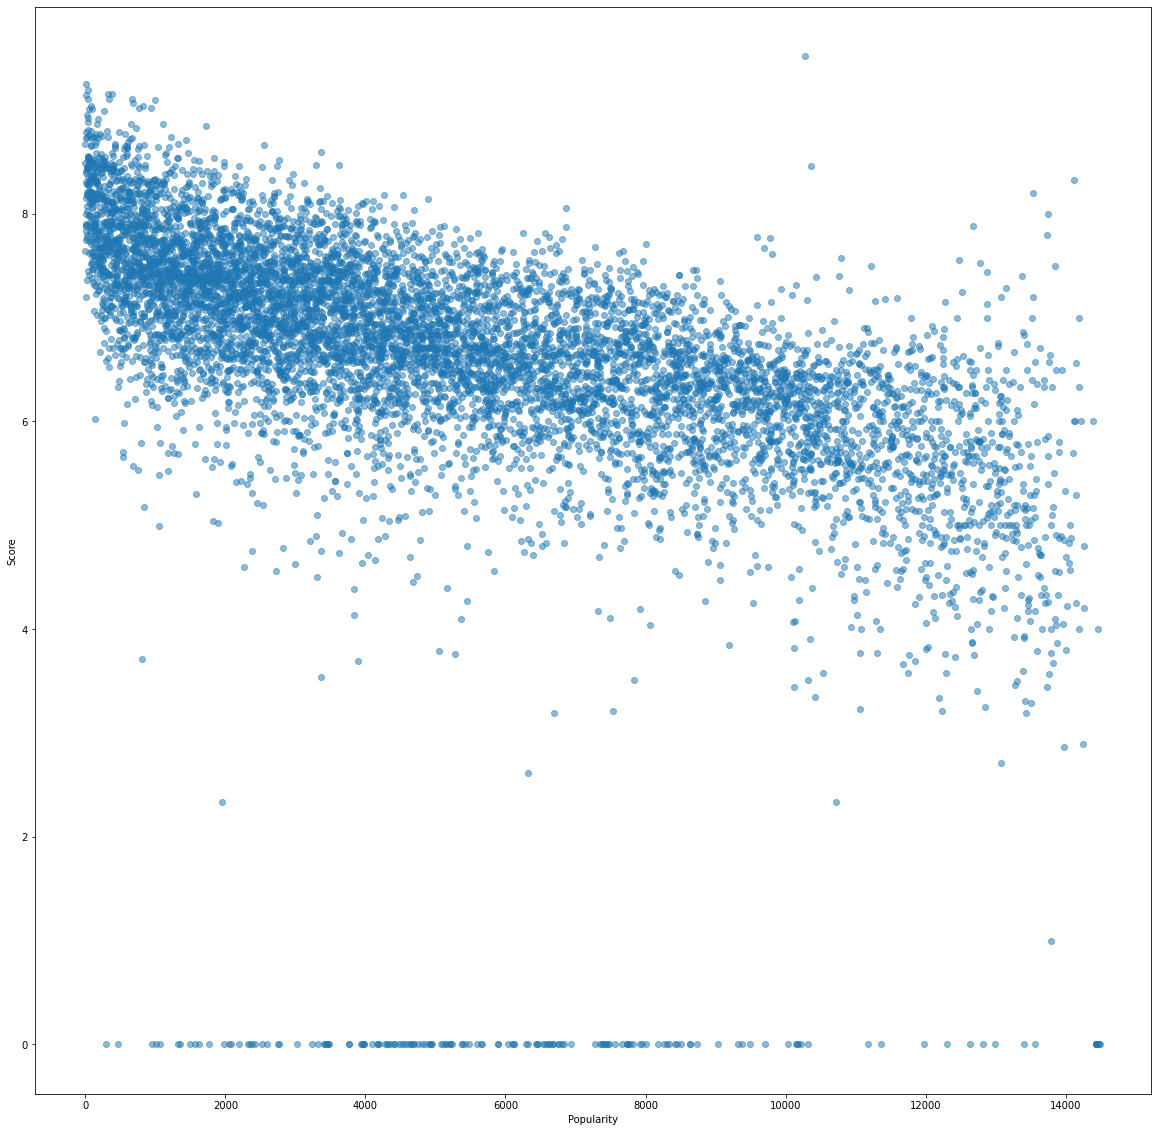

In [38]:
plt.figure(figsize=(20, 20))
plt.scatter(anime_df['popularity'], anime_df['score'], alpha=0.5)
plt.xlabel('Popularity')
plt.ylabel('Score')
plt.show()

This also seems have a slight negative correlation if we ignore the anime with 0 score, however the data is much more scattered than for rank vs score

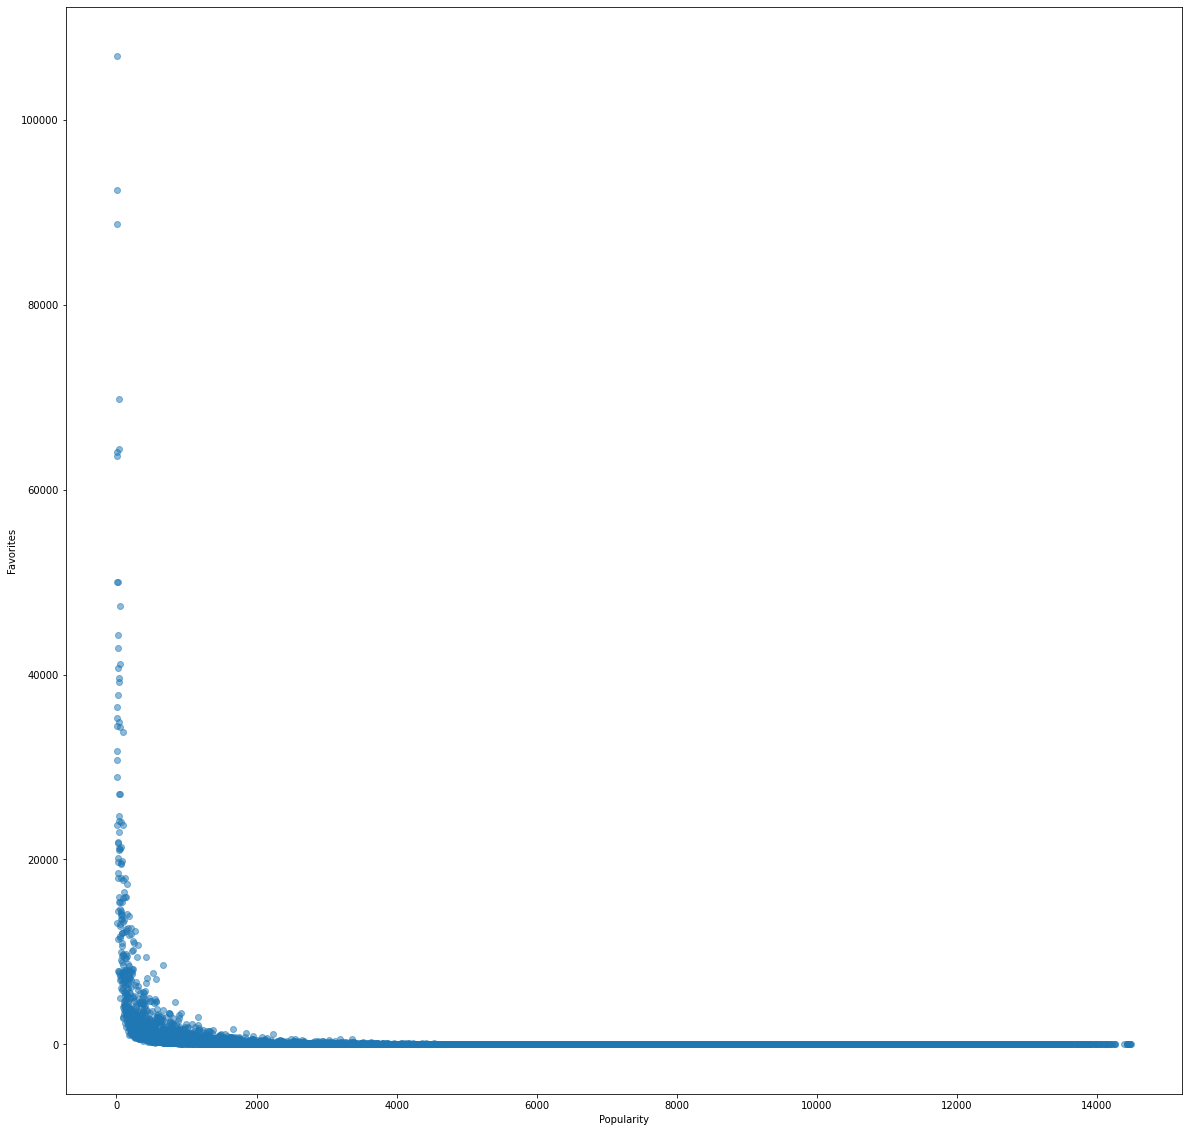

In [39]:
plt.figure(figsize=(20, 20))
plt.scatter(anime_df['popularity'], anime_df['favorites'], alpha=0.5)
plt.xlabel('Popularity')
plt.ylabel('Favorites')
plt.show()

That's quite a steep dropoff in number of favorites. The disaparity in favorites for the most popular shows and the next is also very large. Let's try scaling the y-axis by taking the logarithm

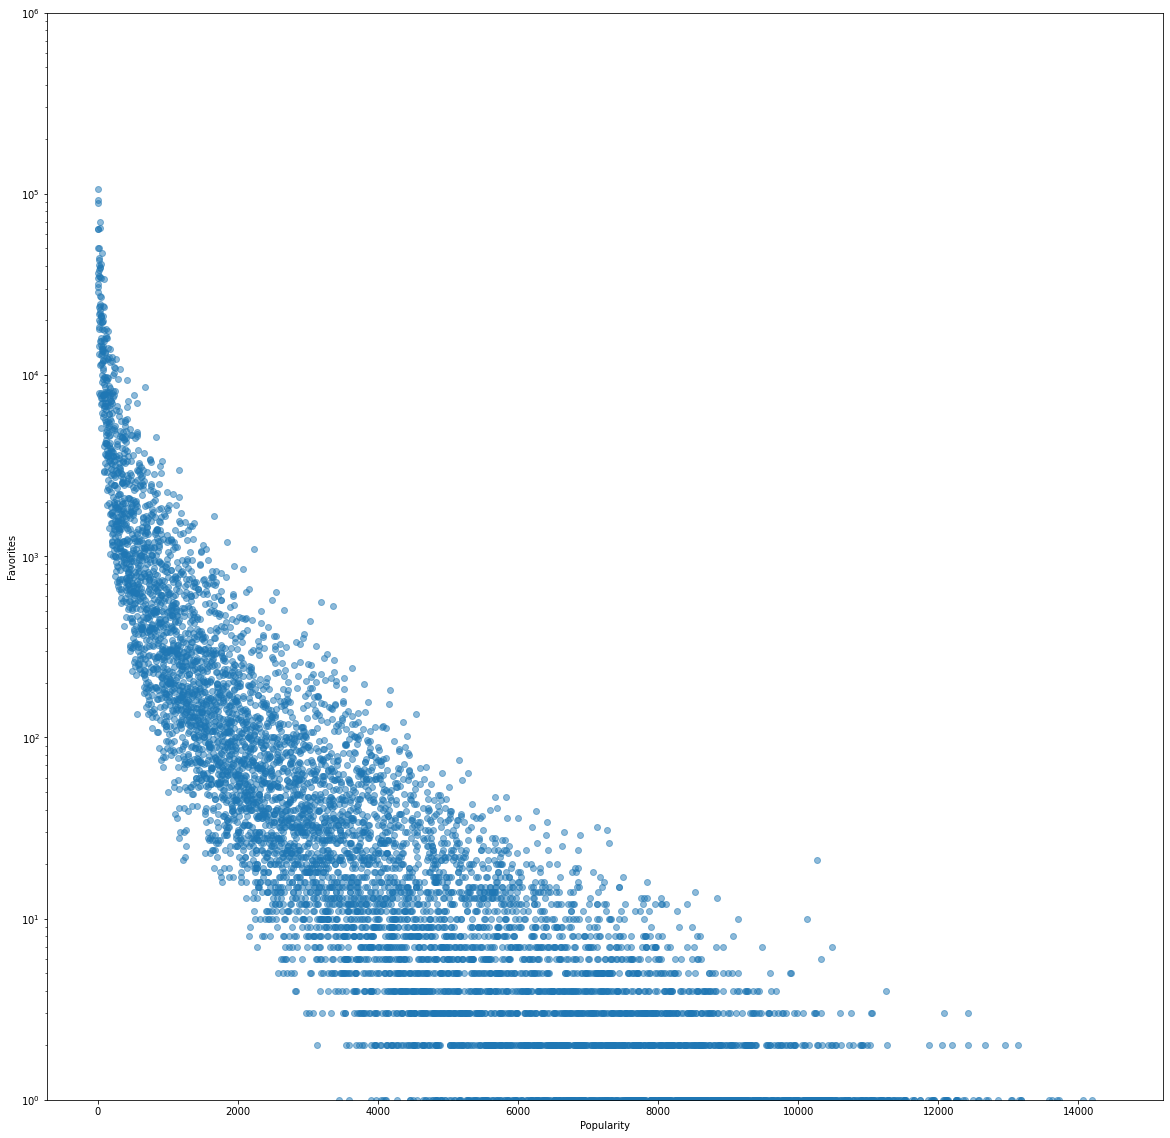

In [46]:
plt.figure(figsize=(20, 20))
plt.yscale("log")
plt.ylim(1, 10e5)
plt.scatter(anime_df['popularity'], anime_df['favorites'], alpha=0.5)
plt.xlabel('Popularity')
plt.ylabel('Favorites')
plt.show()

Now this looks like a non-linear negative correlation. Let's calculate the correlation coefficients

In [47]:
pcorr, _ = pearsonr(clean_ranked['popularity'], clean_ranked['favorites'])
scorr, _ = spearmanr(clean_ranked['popularity'], clean_ranked['favorites'])
print("Pearson's Corr: {}".format(pcorr))
print("Spearman's Corr: {}".format(scorr))

Pearson's Corr: -0.22729536435116893
Spearman's Corr: -0.922710210281996


As expected, the linear correlation is very low but the non-linear coefficient is quite high.

Seeing all these trends in the popularity and rank, we can try to build a model that will predict the popularity/rank of a show given it's ratings. This is done in the Machine Learning section

## Gender Distribution

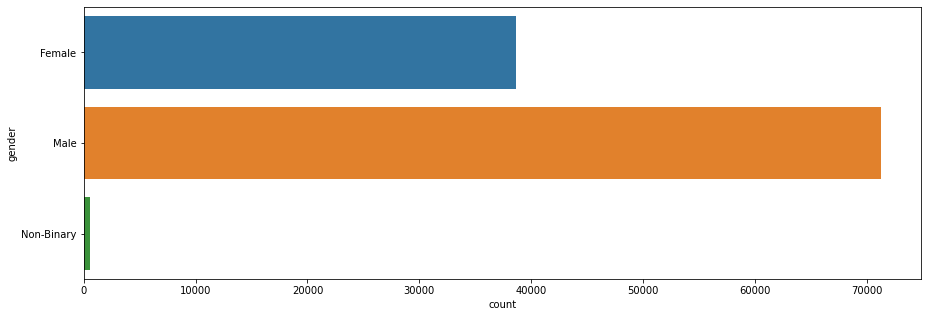

In [20]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'gender' , data = users_df)
plt.show()

We see that more than half the dataset is Male, and a little more than a third is female. A very small percent is non-binary. \\

This suggests that we might have to downsample or upsample for our model (in the Machine Learning section) if the confusion matrix is uneven.

## Correlations between watching habits

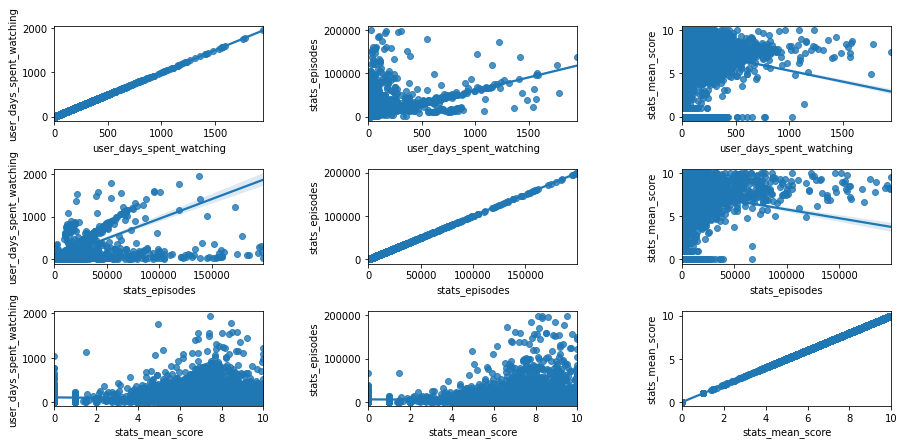

In [36]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['user_days_spent_watching' , 'stats_episodes' , 'stats_mean_score']:
    for y in ['user_days_spent_watching' , 'stats_episodes' , 'stats_mean_score']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = users_df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

We see that there is somewhat of a linear relationship between Days spendt watching and Number of episodes, which is expected since seeing more episodes requires more time. There is no clear relationship discernable between the other fields

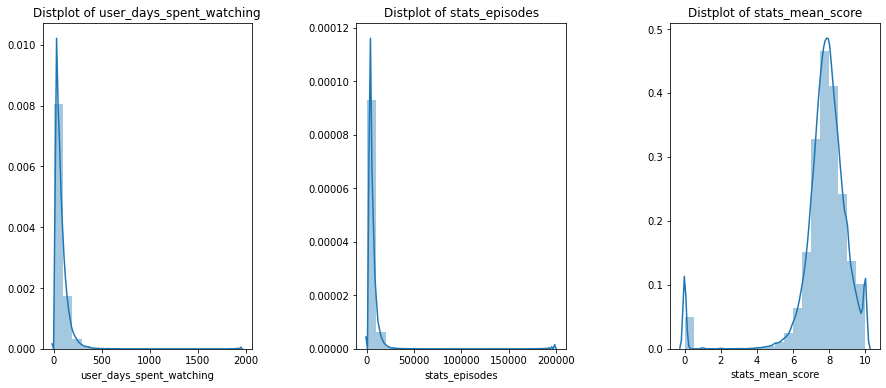

In [37]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['user_days_spent_watching' , 'stats_episodes' , 'stats_mean_score']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(users_df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

From the dsitributions of these, we see that The days spent watching and episodes have a long-tailed gaussian distribution with a peak at a low value and the tail going to 0 at higher values.
There are some small abnormalities at high values and this might be due to noisy data.

For the mean score we see that the plot is a shifted gaussian, centered around a score of 8, with a smaller peak near 0. This shows that in general shows are liked and rated highly by at least some subset of its viewerbase which leads to its average ratings being quite high.

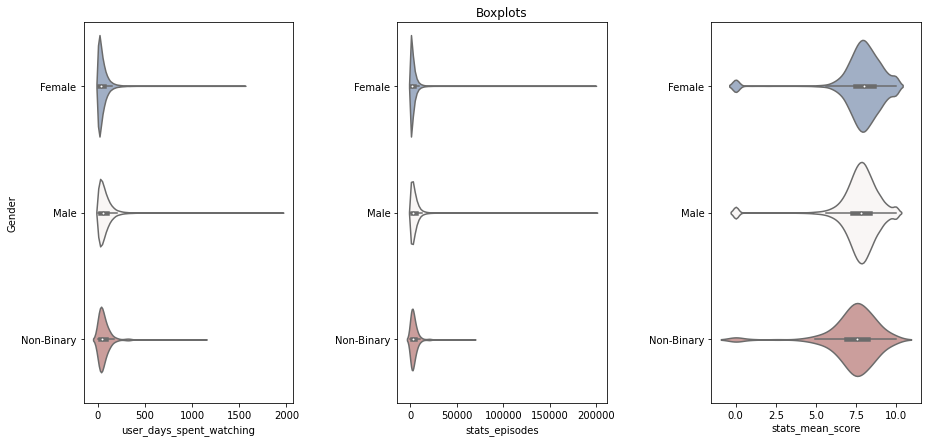

In [27]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for cols in ['user_days_spent_watching' , 'stats_episodes' , 'stats_mean_score']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'gender' , data = users_df , palette = 'vlag')
    # sns.swarmplot(x = cols , y = 'gender' , data = users_df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots' if n == 2 else '')
plt.show()

From these violins plots we see that the distributions of these features are not very different for the various genders. They all peak around the same value and have a similar shape. \\

One thing is that the days spent watching and number of episodes have sharper peaks for Females than other genders.

# Feature Vectors Generation

## Anime Vectors

Now let's try to group anime based on their genres. We will use one-hot encodings to get the genre information and then merge it with other numerical information about the anime to get the vector representations

In [0]:
# %%spark

def get_genre_list(row):
    """gets the genres as a list
    Parameters
    ----------
    row: row to apply on, dataframe must have a "genre" column

    Returns
    -------
    the genre list
    """
    
    genres = row['genre'].split(',')
    stripped = [i.strip() for i in genres]
    return stripped

In [0]:
# %%spark

anime_df['genre_list'] = anime_df.apply(get_genre_list,axis=1)

In [21]:
# %%spark

anime_df['genre_list']

0          [Comedy, Supernatural, Romance, Shounen]
1        [Comedy, Parody, Romance, School, Shounen]
2                   [Comedy, Magic, School, Shoujo]
3          [Comedy, Drama, Magic, Romance, Fantasy]
4                 [Comedy, Drama, Romance, Shounen]
                            ...                    
14457                                 [Drama, Kids]
14460                                        [Kids]
14465                                [Kids, School]
14466                                        [Kids]
14473                                      [Comedy]
Name: genre_list, Length: 8532, dtype: object

In [0]:
# %%spark

# Binarize
from sklearn.preprocessing import MultiLabelBinarizer
gl = anime_df['genre_list']
mlb = MultiLabelBinarizer()
anime_oh_genres = pd.DataFrame(mlb.fit_transform(gl),columns=mlb.classes_, index=anime_df.anime_id)

In [52]:
# %%spark

anime_oh_genres.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
anime_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11013,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2104,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5262,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
721,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12365,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Let's also get one-hot vectors for some other categorical fields. We do this for studio, type and source since they could be useful features.

In [0]:
# %%spark

studio_source_oh = pd.get_dummies(anime_df, columns=['studio','source', 'type'])

Let's drop the columns we won't be using for features (like name, url)

In [0]:
# %%spark

studio_source_oh = studio_source_oh.drop(columns=['title', 'title_english', 'title_japanese', 'title_synonyms', 'image_url', 'status', 'airing', 'aired_string', 'aired', 'rating', 'background', 'premiered', 'broadcast', 'related', 'producer', 'licensor', 'opening_theme', 'ending_theme', 'genre'])

In [26]:
# %%spark

studio_source_oh.head()

,anime_id,episodes,duration,score,scored_by,rank,popularity,members,favorites,genre_list,studio_10Gauge,studio_2:10 Animation,studio_33 Collective,studio_8bit,studio_A-1 Pictures,"studio_A-1 Pictures, Bridge","studio_A-1 Pictures, CloverWorks","studio_A-1 Pictures, Ordet","studio_A-1 Pictures, TROYCA","studio_A-1 Pictures, Trigger, CloverWorks",studio_A-Line,studio_A-Real,studio_A.C.G.T.,studio_ACC Production,studio_AIC,studio_AIC A.S.T.A.,studio_AIC Build,studio_AIC Classic,studio_AIC Frontier,studio_AIC Plus+,studio_AIC Spirits,"studio_AIC Spirits, Asread","studio_AIC Spirits, BeSTACK","studio_AIC Spirits, Digital Frontier","studio_AIC Spirits, Group TAC",studio_AIC Takarazuka,"studio_AIC, APPP","studio_AIC, Animate Film","studio_AIC, Artmic","studio_AIC, Artmic, Animate Film",...,studio_Zero-G,studio_Zero-G Room,studio_Zexcs,"studio_Zexcs, Studio A-CAT",studio_domerica,studio_drop,studio_dwarf,studio_feel.,"studio_feel., Zexcs",studio_helo.inc,studio_iDRAGONS Creative Studio,"studio_ixtl, LIDENFILMS",studio_pH Studio,"studio_pH Studio, D &amp; D Pictures",studio_production doA,studio_ufotable,"studio_ufotable, feel., Studio Flag",source_4-koma manga,source_Book,source_Card game,source_Digital manga,source_Game,source_Light novel,source_Manga,source_Music,source_Novel,source_Original,source_Other,source_Picture book,source_Radio,source_Unknown,source_Visual novel,source_Web manga,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,type_Unknown
0,11013,12,24 min. per ep.,7.63,139250,1274.0,231,283882,2809,"[Comedy, Supernatural, Romance, Shounen]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2104,26,24 min. per ep.,7.89,91206,727.0,366,204003,2579,"[Comedy, Parody, Romance, School, Shounen]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,5262,51,24 min. per ep.,7.55,37129,1508.0,1173,70127,802,"[Comedy, Magic, School, Shoujo]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,721,38,16 min. per ep.,8.21,36501,307.0,916,93312,3344,"[Comedy, Drama, Magic, Romance, Fantasy]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,12365,25,24 min. per ep.,8.67,107767,50.0,426,182765,2082,"[Comedy, Drama, Romance, Shounen]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Looks like almost all of our data is numerical now. We need to process the duration to get the numerical values from the string, and we need to replace the genre_list with our computed one-hot vectors earlier. Once we have this, we can use the result as a vector representation of an Anime for model training later.

In [0]:
# %%spark

import re
def get_duration(row):
    """gets the duration number in mins from the duration column
    Parameters
    ----------
    row: row to apply on, dataframe must have a "duration" column

    Returns
    -------
    the duration
    """
    hours = 0
    mins = 0
    hour_list = re.findall(r'\d+ hr', row['duration'])

    if len(hour_list) > 0:
      hours = int(hour_list[0][:1])
    mins_list = re.findall(r'\d+ min', row['duration'])
    if len(mins_list) > 0:
      mins = int(mins_list[0].split()[0])
    secs_list = re.findall(r'\d+ sec', row['duration'])
    if len(secs_list) > 0:
      mins += 1
    total_duration = hours * 60 + mins
    return int(total_duration)

In [0]:
# %%spark

studio_source_oh['duration'] = studio_source_oh.apply(get_duration,axis=1)

In [0]:
# %%spark

studio_source_oh.head()

,anime_id,episodes,duration,score,scored_by,rank,popularity,members,favorites,genre_list,studio_10Gauge,studio_2:10 Animation,studio_33 Collective,studio_8bit,studio_A-1 Pictures,"studio_A-1 Pictures, Bridge","studio_A-1 Pictures, CloverWorks","studio_A-1 Pictures, Ordet","studio_A-1 Pictures, TROYCA","studio_A-1 Pictures, Trigger, CloverWorks",studio_A-Line,studio_A-Real,studio_A.C.G.T.,studio_ACC Production,studio_AIC,studio_AIC A.S.T.A.,studio_AIC Build,studio_AIC Classic,studio_AIC Frontier,studio_AIC Plus+,studio_AIC Spirits,"studio_AIC Spirits, Asread","studio_AIC Spirits, BeSTACK","studio_AIC Spirits, Digital Frontier","studio_AIC Spirits, Group TAC",studio_AIC Takarazuka,"studio_AIC, APPP","studio_AIC, Animate Film","studio_AIC, Artmic","studio_AIC, Artmic, Animate Film",...,studio_Zero-G,studio_Zero-G Room,studio_Zexcs,"studio_Zexcs, Studio A-CAT",studio_domerica,studio_drop,studio_dwarf,studio_feel.,"studio_feel., Zexcs",studio_helo.inc,studio_iDRAGONS Creative Studio,"studio_ixtl, LIDENFILMS",studio_pH Studio,"studio_pH Studio, D &amp; D Pictures",studio_production doA,studio_ufotable,"studio_ufotable, feel., Studio Flag",source_4-koma manga,source_Book,source_Card game,source_Digital manga,source_Game,source_Light novel,source_Manga,source_Music,source_Novel,source_Original,source_Other,source_Picture book,source_Radio,source_Unknown,source_Visual novel,source_Web manga,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,type_Unknown
0,11013,12,24,7.63,139250,1274.0,231,283882,2809,"[Comedy, Supernatural, Romance, Shounen]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2104,26,24,7.89,91206,727.0,366,204003,2579,"[Comedy, Parody, Romance, School, Shounen]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,5262,51,24,7.55,37129,1508.0,1173,70127,802,"[Comedy, Magic, School, Shoujo]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,721,38,16,8.21,36501,307.0,916,93312,3344,"[Comedy, Drama, Magic, Romance, Fantasy]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,12365,25,24,8.67,107767,50.0,426,182765,2082,"[Comedy, Drama, Romance, Shounen]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Looks great! Another thing we should check is the scaling of some fields like scored_by, members, favorites and popularity. Let's look at some statistics for these fields

In [0]:
# %%spark

cols = ['scored_by', 'members','favorites','popularity']
df_num = studio_source_oh[['scored_by', 'members','favorites','popularity']]
maxs = []
mins = []
stds = []
means = []
for col in cols:
  data = studio_source_oh[col]
  maxs.append(np.max(data))
  mins.append(np.min(data))
  stds.append(np.std(data))
  means.append(np.mean(data))

In [27]:
# %%spark

print(maxs)
print(mins)
print(stds)
print(means)

[1009477, 1456378, 106895, 14486]
[0, 9, 0, 1]
[54853.04997035858, 94757.6801763322, 3390.571386513591, 3687.056263878]
[19108.018401312704, 38034.073839662444, 525.8598218471636, 5244.174871073606]


There seems to be quite a bit of variablity in these values, especially for scored_by and members fields. Let's rescale these to avoid numerical instability issues.

In [0]:
# %%spark

studio_source_oh['scored_by_log'] = np.log(studio_source_oh['scored_by'] + 1)
studio_source_oh['members_log'] = np.log(studio_source_oh['members'] + 1)
studio_source_oh['favorites_log'] = np.log(studio_source_oh['favorites'] + 1)
studio_source_oh['popularity_log'] = np.log(studio_source_oh['popularity'] + 1)

Let's see some visualizations of these distributions now

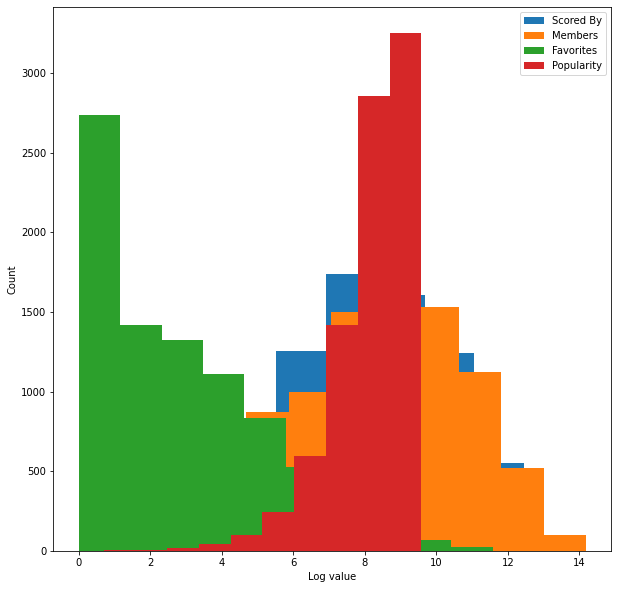

In [31]:
# %%spark
plt.figure(figsize=(10, 10))
plt.hist(studio_source_oh['scored_by_log'], label='Scored By')
plt.hist(studio_source_oh['members_log'], label='Members')
plt.hist(studio_source_oh['favorites_log'], label='Favorites')
plt.hist(studio_source_oh['popularity_log'], label='Popularity')
plt.legend()
plt.xlabel('Log value')
plt.ylabel('Count')
plt.show()

Looks like most of the fields follow a Gaussian distribution, except for Favorites which seems to have a monotonically decreasing distribution. This makes sense since the few top shows would be favorited a lot and as we go to more obscure shows, they would be favorited by fewer people.

Now let's drop the unscaled values from the Dataframe and also get rid of the genre_list

In [0]:
# %%spark

studio_source_oh = studio_source_oh.drop(columns=['scored_by', 'members', 'favorites', 'popularity', 'genre_list'])

Let's drop any NaNs that may have resulted from calculating Logarithms

In [0]:
studio_source_oh = studio_source_oh.dropna()

In [0]:
# %%spark

studio_source_oh = studio_source_oh.set_index('anime_id')

Now let's join these features with the genre one-hot vectors we generated earlier for each anime

In [0]:
# %%spark
# anime_feat = studio_source_oh.merge(anime_oh_genres, left_on='anime_id', right_index=True)
anime_feat = studio_source_oh.merge(anime_oh_genres, left_index=True, right_index=True)

In [66]:
# %%spark

anime_feat.head()

,anime_id,episodes,duration,score,rank,studio_10Gauge,studio_2:10 Animation,studio_33 Collective,studio_8bit,studio_A-1 Pictures,"studio_A-1 Pictures, Bridge","studio_A-1 Pictures, CloverWorks","studio_A-1 Pictures, Ordet","studio_A-1 Pictures, TROYCA","studio_A-1 Pictures, Trigger, CloverWorks",studio_A-Line,studio_A-Real,studio_A.C.G.T.,studio_ACC Production,studio_AIC,studio_AIC A.S.T.A.,studio_AIC Build,studio_AIC Classic,studio_AIC Frontier,studio_AIC Plus+,studio_AIC Spirits,"studio_AIC Spirits, Asread","studio_AIC Spirits, BeSTACK","studio_AIC Spirits, Digital Frontier","studio_AIC Spirits, Group TAC",studio_AIC Takarazuka,"studio_AIC, APPP","studio_AIC, Animate Film","studio_AIC, Artmic","studio_AIC, Artmic, Animate Film","studio_AIC, Artmic, Darts","studio_AIC, BeSTACK","studio_AIC, Darts","studio_AIC, Remic","studio_AIC, Studio Hakk",...,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,11013,12,24,7.63,1274.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,2104,26,24,7.89,727.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,5262,51,24,7.55,1508.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,721,38,16,8.21,307.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,12365,25,24,8.67,50.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Great! Looks like we have a feature vector representation for each anime!

## User Vectors

Let's first get rid of fields that we think won't be useful as features

In [0]:
users_oh = users_df.drop(columns=['user_watching', 'user_completed', 'user_id', 'user_onhold', 'user_dropped', 'user_plantowatch', 'location', 'join_date', 'last_online', 'stats_rewatched'])

In [25]:
users_oh.head()

,username,user_days_spent_watching,gender,birth_date,stats_mean_score,stats_episodes
0,karthiga,55.31,Female,1990-04-29,7.43,3391.0
2,Damonashu,83.70,Male,1991-08-01,6.15,4936.0
3,bskai,167.16,Male,1990-12-14,8.27,10081.0
4,terune_uzumaki,15.20,Female,1998-08-24,9.70,920.0
5,Bas_G,30.81,Male,1999-10-24,7.86,1847.0


We need to binarize the gender field and we can also change the birthdate to just the birth year

In [0]:
def get_birthyear(row):
    """gets the birthyear from the birth_date column
    Parameters
    ----------
    row: row to apply on, dataframe must have a "birth_date" column

    Returns
    -------
    the year
    """
    year = row['birth_date'][:4]
    return int(year)

In [0]:
def get_gender(row):
    """gets the binary value for gender
    Parameters
    ----------
    row: row to apply on, dataframe must have a "gender" column

    Returns
    -------
    0 for male 1 for female
    """
    g = row['gender']
    if g == 'Male':
      return 0
    elif g == 'Female':
      return 1
    else:
      return 2

In [0]:
users_oh['year'] = users_oh.apply(get_birthyear,axis=1)

In [0]:
users_oh['gender'] = users_oh.apply(get_gender, axis=1)

In [95]:
users_oh.head()

,username,user_days_spent_watching,gender,stats_mean_score,stats_episodes,year
0,karthiga,55.31,1,7.43,3391.0,1990
2,Damonashu,83.70,0,6.15,4936.0,1991
3,bskai,167.16,0,8.27,10081.0,1990
4,terune_uzumaki,15.20,1,9.70,920.0,1998
5,Bas_G,30.81,0,7.86,1847.0,1999


In [0]:
users_oh = users_oh.drop(columns=['birth_date'])

We should get rid of users who have unrealistic values for year of birth and who stats_episodes is unreasonably high.

In [0]:
users_oh = users_oh[users_oh['year'] < 2021]
users_oh = users_oh[users_oh['year'] > 1900]

In [0]:
users_oh = users_oh[users_oh['stats_episodes'] < 1000000]

### **Did Not Work:** User Genres

Now let's try to see if we can get one-hot vectors for the genres that users like by looking at anime they rated highly

In [0]:
pysqldf = lambda q: ps.sqldf(q, globals())

In [0]:
q  = """
SELECT
  l.username, GROUP_CONCAT ( g.genre ) as "genres"
FROM
  lists_df l 
JOIN 
  genre_df g ON l.anime_id = g.anime_id
WHERE l.my_score > 6
GROUP BY l.username;
"""

In [0]:
user_genres_df = pysqldf(q)

Oh no! Looks like the tables are too large for Pandas to handle the join. Let's see the sizes

In [0]:
print(len(lists_df))
print(len(genre_df))
print(len(lists_df) * len(genre_df))

35802006
29383
1051970342298


An upper bound of **1 TRILLION** results. There certainly aren't that many but even a few hundred billion ought to be tough for pandas. I guess we need to bring out the Big Guns now.

![alt text](https://images.8tracks.com/cover/i/008/997/446/his-power-level-its-over-9000-8743.jpg?rect=55,0,441,441&q=98&fm=jpg&fit=max)

### SPARK to the Rescue! (User Genres)

Let's try getting the User Genres again, but this time using Spark

In [0]:
from pyspark.sql.types import *


users_schema = StructType([
    StructField("username", StringType(), nullable=False),
    StructField("user_days_spent_watching", FloatType()),
    StructField("gender", IntegerType()),
    StructField("stats_mean_score", FloatType()),
    StructField("stats_episodes", FloatType()),
    StructField("year", IntegerType())
])

In [0]:
# %%spark
lists_sdf = spark.read.format("csv").option("header", "true").load(path+'/animelists_filtered.csv')
genres_sdf = spark.createDataFrame(genre_df)
users_sdf = spark.createDataFrame(users_oh, schema=users_schema)

In [0]:
# %%spark

# Create SQL-accesible table
lists_sdf.createOrReplaceTempView("lists")
genres_sdf.createOrReplaceTempView("genres")
users_sdf.createOrReplaceTempView("users")
query = '''
        SELECT
          l.username, collect_set(g.genre) AS genres
        FROM
          lists l 
        JOIN 
          users u ON l.username = u.username
        JOIN
          genres g ON l.anime_id = g.anime_id
        WHERE l.my_score > 6
        GROUP BY l.username
        '''

# Save the output sdf of spark.sql() as answer_sdf and convert to Pandas
user_genres_sdf = spark.sql(query)

In [0]:
# %%spark
user_genres_df = user_genres_sdf.toPandas()

In [47]:
user_genres_df[user_genres_df['username'] == 'Xinil']

,username,genres
62062,Xinil,"[Thriller, Parody, Action, Martial Arts, Magic..."


In [0]:
gs = user_genres_df['genres']
mlb2 = MultiLabelBinarizer()
user_oh_genres = pd.DataFrame(mlb2.fit_transform(gs),columns=mlb.classes_, index=user_genres_df.username)

In [42]:
user_oh_genres.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
-Elegy-,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,0
-Himeko,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0
-Yuka-,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,0,1,0,0,1,1,1,1,0,0
ACPaco,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,0,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,0,1,1,0,1,1,1,1,0,0
AGXVI,1,1,0,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,1,1,0,0


In [0]:
user_feat = users_oh.merge(user_oh_genres, left_on='username', right_index=True)

In [0]:
user_feat = user_feat.set_index('username')

In [45]:
user_feat.head()

,user_days_spent_watching,gender,stats_mean_score,stats_episodes,year,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,Hentai,Historical,Horror,Josei,Kids,Magic,Martial Arts,Mecha,Military,Music,Mystery,Parody,Police,Psychological,Romance,Samurai,School,Sci-Fi,Seinen,Shoujo,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
karthiga,55.31,1,7.43,3391.0,1990,1,1,0,1,0,1,1,1,1,1,1,0,1,1,1,0,1,1,0,0,1,1,1,0,0,1,0,1,1,1,1,0,1,1,1,0,1,1,1,0,0,0,0
Damonashu,83.70,0,6.15,4936.0,1991,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,0,0
bskai,167.16,0,8.27,10081.0,1990,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0
terune_uzumaki,15.20,1,9.70,920.0,1998,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0
Bas_G,30.81,0,7.86,1847.0,1999,1,1,0,1,0,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,0,1,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,0


# Machine Learning!

## Generate Examples

Let's train a machine learning model to predict if a user will like a particular anime using the vector representations of users and anime we've developed!

**Generating examples** \\
How can we get labels for this task?? It's simple! We can take data from the AnimeLists table and if a user has rated an anime highly, then it is a positive example, and if they rated it poorly, it is a negative example! The labels can simply be the score given by the user since this is a value from 0-10. 

We will take a subset of the data for the training and testing. We will use 500,000 samples for training and 100,000 for testing. \\

The entire animelists data has **35 Million** values and while it would be cool to be able to use all of them, doing this resulted in multiple crashes of Colab as well as extremely slow sample generation and model training. \\

As a result, I finally only used 600K of the datapoints, but this could easily be extended to the full data.

In [0]:
features_train = []
labels_train = []
features_test = []
labels_test = []

In [53]:
for i, one in lists_df.iterrows():
  if i == 600000:
    break
  elif i % 1000 == 0:
    print("Finished {} K steps".format(i/1000))
    if i > 1 and len(features_train) == 0:
      break
  try:
    a_f = np.array(anime_feat.loc[one['anime_id'] , :])
    u_f = np.array(user_feat.loc[one['username'], :])

    if i <= 500000:
      features_train.append(np.concatenate([u_f, a_f]))

      # add label
      labels_train.append(one['my_score'])
    else:
      features_test.append(np.concatenate([u_f, a_f]))
      labels_test.append(one['my_score'])
  except:
    continue

Finished 0.0 K steps
Finished 1.0 K steps
Finished 2.0 K steps
Finished 3.0 K steps
Finished 4.0 K steps
Finished 5.0 K steps
Finished 6.0 K steps
Finished 7.0 K steps
Finished 8.0 K steps
Finished 9.0 K steps
Finished 10.0 K steps
Finished 11.0 K steps
Finished 12.0 K steps
Finished 13.0 K steps
Finished 14.0 K steps
Finished 15.0 K steps
Finished 16.0 K steps
Finished 17.0 K steps
Finished 18.0 K steps
Finished 19.0 K steps
Finished 20.0 K steps
Finished 21.0 K steps
Finished 22.0 K steps
Finished 23.0 K steps
Finished 24.0 K steps
Finished 25.0 K steps
Finished 26.0 K steps
Finished 27.0 K steps
Finished 28.0 K steps
Finished 29.0 K steps
Finished 30.0 K steps
Finished 31.0 K steps
Finished 32.0 K steps
Finished 33.0 K steps
Finished 34.0 K steps
Finished 35.0 K steps
Finished 36.0 K steps
Finished 37.0 K steps
Finished 38.0 K steps
Finished 39.0 K steps
Finished 40.0 K steps
Finished 41.0 K steps
Finished 42.0 K steps
Finished 43.0 K steps
Finished 44.0 K steps
Finished 45.0 K step

Our Full feature input will be user vector concatenated with anime vector

In [54]:
print("We have {} features and {} labels for training".format(len(features_train), len(labels_train)))
print("We have {} features and {} labels for testing".format(len(features_test), len(labels_test)))

We have 447589 features and 447589 labels for training
We have 87410 features and 87410 labels for testing


### Read and Write From File

Let's write this to a file so we can load it again later

In [0]:
with open(path+'/score_data.txt', mode='w') as f:
  for i in range(len(features)):
    f.write(str(features[i]))
    f.write('\t')
    f.write(str(labels[i]))
    f.write('\n')

Load the data from file

In [0]:
features = []
labels = []
count = 0
with open(path+'/score_data.txt', mode='r') as f:
  for line in f:
    count += 1
    if count % 100000 == 0:
      print(count)
    try:
      feat, lab = line.split('\t')
      feature = np.fromstring(feat[1:-1], sep=',')
      features.append(feature)
      labels.append(int(lab))
    except:
      continue

## Let's Create our models

Run this cell before running any models so we that we have imported all the necessary machinery from Scikit!

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics.pairwise import cosine_similarity

### Score Model

In [0]:
x_train, x_test, y_train, y_test = train_test_split(features_train, labels_train, test_size=0.20)

In [64]:

# Your code goes here
score_model = LinearRegression()
score_model.fit(x_train, y_train)


y_pred_train = score_model.predict(x_train)
y_pred = score_model.predict(x_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(mse_train)
print(mse_test)

13.316419488856862
13.349394000474303


In [63]:
print(accuracy_score(y_train, np.rint(y_pred_train)))
print(accuracy_score(y_test, np.rint(y_pred)))

0.06557358736116581
0.06657878862351706


This model only get 6% accuracy on both the training and the test set. Moreover, the error looks quite high. Clearly LinearRegression is not expressive enough for this. Let's try some other classifiers

In [65]:

model = LogisticRegression()
model.fit(x_train, y_train)


y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(mse_train)
print(mse_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


43.17768822384387
43.15492973480194


In [66]:
print(accuracy_score(y_train, np.rint(y_pred_train)))
print(accuracy_score(y_test, np.rint(y_pred)))

0.30443962230954197
0.30448624857570544


Logistic Regression performs much better, with an accuracy of 30% on the train and test sets! This is much better than random guessing, which only has an accuracy of 1/11 ~ 9% \\
Let's see if we can do better with Random Forests

In [67]:
model = RandomForestRegressor()
model.fit(x_train, y_train)


y_pred_train = model.predict(x_train)
y_pred = model.predict(x_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(mse_train)
print(mse_test)

1.593006989395958
11.39882351929221


In [68]:
print(accuracy_score(y_train, np.rint(y_pred_train)))
print(accuracy_score(y_test, np.rint(y_pred)))

0.30843882917075105
0.11922741794946268


Random Forests does equally well on the train set but fairs poorly on the testset. Additionally, it looks like the error is pretty high with these classifiers. Perhaps, we should try neural nets and see if we get any better results

#### **Did not work:** Mxnet Neural Nets

In [0]:
%%capture
!pip3 install mxnet-cu101

In [0]:
%%capture
!pip3 install --upgrade mxnet-cu101 gluoncv

In [0]:
import mxnet as mx
from gluoncv.utils import viz
from mxnet.gluon.data import DataLoader
from mxnet.gluon.data.vision import transforms
# from mxnet import np

In [0]:
from mxnet import gluon, autograd, ndarray

def construct_ff_net():
    ff_net = gluon.nn.Sequential()

    ff_net.add(gluon.nn.Dense(512, activation="relu"), gluon.nn.Dense(256, activation="relu"),gluon.nn.Dense(128, activation="relu"), gluon.nn.Dense(10))
    return ff_net

ff_net  = construct_ff_net()
#TODO: Initialize the network
ctx =  mx.gpu() if mx.context.num_gpus() else mx.cpu()
ff_net.initialize(mx.init.Xavier(), ctx=ctx)
criterion = gluon.loss.SoftmaxCrossEntropyLoss()
BATCH_SIZE = 32
trainer = mx.gluon.Trainer(ff_net.collect_params(), 'adam', {'learning_rate':0.002})

In [0]:
# from mxnet.gluon import utils, data as gdata
features = [i.astype('float32') for i in features]
dataset = gluon.data.ArrayDataset(features, labels)
dataloader = gluon.data.DataLoader(dataset, batch_size=BATCH_SIZE)

In [0]:

#TODO: Define a training function which trains the passed network for the given number of epochs using the provided optimizer and criterion
# The function should return the final training loss and the final training accuracy
def train_network(net, train_loader, criterion, trainer, metric, epochs = 10):
    #TODO: Define your training loop here
    training_accuracy = []
    training_loss = []
    for ep in range(epochs):
      train_acc = 0.
      training_samples = 0
      batch_count = 0 
      cumulative_train_loss = mx.nd.zeros(1, ctx = ctx) 
      for data, label in train_loader:
        # print(data)
        img = data
        with autograd.record():
          output = net(img.as_in_context(ctx))
          loss = criterion(output, np.array(label).as_in_context(ctx))
        loss.backward()
        trainer.step(BATCH_SIZE)
        # calculate training metrics
        metric.update(preds=output, labels=label)
        _, acc = metric.get()
        train_acc += acc
        batch_count += 1
        # train_loss += loss.mean().asscalar()
        cumulative_train_loss += loss.sum() 
        training_samples += data.shape[0]
      train_loss = cumulative_train_loss.asscalar()/training_samples
      training_loss.append(train_loss)
      training_accuracy.append(train_acc/batch_count)
      print('Accuracy:', train_acc/batch_count)
      print('Loss:', train_loss)
    
    final_training_accuracy = training_accuracy[-1] #TODO: Set this to final training accuracy
    final_training_loss = training_loss[-1] #TODO: Set this to final testing accuracy

    # plot acc and loss
    plt.plot(list(range(epochs)), training_accuracy)
    plt.xlabel('num epochs')
    plt.ylabel('Training accuracy')
    # plt.title('Acc over time')
    plt.show()
    plt.plot(list(range(epochs)), training_loss)
    plt.xlabel('num epochs')
    plt.ylabel('Training loss')
    # plt.title('Acc over time')
    plt.show()
    return final_training_loss, final_training_accuracy

In [0]:
def test_model(net, criterion, test_loader, metric):
    #TODO
    with autograd.predict_mode():
      test_acc = 0.
      test_samples = 0
      cumulative_test_loss = mx.nd.zeros(1, ctx = ctx) 
      for data, label in test_loader:
          output = net(data.as_in_context(ctx))
          loss = criterion(output, label.as_in_context(ctx))
          metric.update(preds=output, labels=label)
          _, acc = metric.get()
          test_acc += acc
          cumulative_test_loss += loss.sum() 
          test_samples += data.shape[0]
      
      testing_loss = cumulative_test_loss.asscalar()/test_samples
      testing_accuracy = acc
      return  testing_loss, testing_accuracy

In [70]:
x = mx.sym.var('data')
sym = ff_net(x)
mx.viz.print_summary(sym)

________________________________________________________________________________________________________________________
Layer (type)                                        Output Shape            Param #     Previous Layer                  
data(null)                                                                  0                                           
________________________________________________________________________________________________________________________
dense4_fwd(FullyConnected)                                                  512         data                            
________________________________________________________________________________________________________________________
dense4_relu_fwd(Activation)                                                 0           dense4_fwd                      
________________________________________________________________________________________________________________________
dense5_fwd(FullyConnected)      

In [74]:
epochs = 10
metric  =  mx.metric.Accuracy()
ffn_training_loss, ffn_training_accuracy = train_network(ff_net, dataloader, criterion, trainer, metric, epochs)

AttributeError: ignored

In [0]:
metric = mx.metric.Accuracy()
ffn_testing_loss, ffn_testing_accuracy = test_model(ff_net, criterion, test_loader, metric)

In [0]:
a_f = anime_feat.loc[21 , :]
u_f = user_feat.loc['karthiga', :]
feature = np.concatenate([u_f.values, a_f.values])

# add label
label = 9

#### Pytorch Neural Nets

In [0]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

In [152]:
features_train[0].shape

(895,)

In [0]:
input_size = 895
hidden_size = 500     
num_classes = 11     # The number of output classes. In this case, from 0 to 10
num_epochs = 5        
batch_size = 100       
learning_rate = 0.001  

In [0]:
features_tensor = torch.Tensor(features_train)

In [0]:
labels_tensor = torch.Tensor(labels_train).long()

In [156]:
features_tensor.shape

torch.Size([447589, 895])

In [0]:
train_dataset = torch.utils.data.TensorDataset(features_tensor, labels_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [0]:
features_test_tensor = torch.Tensor(features_test)
labels_test_tensor = torch.Tensor(labels_test).long()

In [0]:
test_dataset = torch.utils.data.TensorDataset(features_test_tensor, labels_test_tensor)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [0]:
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()                    
        self.fc1 = nn.Linear(input_size, hidden_size)  
        self.relu = nn.ReLU()
        self.fc2 =  nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.relu3 = nn.ReLU()                         
        self.fc4 = nn.Linear(hidden_size, num_classes) 
    
    def forward(self, x):                            
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        out = self.relu3(out)
        out = self.fc4(out)
        return out

In [0]:
net = Net(input_size, hidden_size, num_classes)

In [0]:
# net.cuda() 

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

In [80]:
for epoch in range(num_epochs):
    for i, (features, labels) in enumerate(train_loader): 
        features = Variable(features)         
        labels = Variable(labels)
        optimizer.zero_grad()                             
        outputs = net(features)                            
        loss = criterion(outputs, labels)                 
        loss.backward()                                   
        optimizer.step()                                 
        # Logging
        if (i+1) % 100 == 0:                        
            print('Epoch [%d/%d], Step [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, len(train_dataset)//batch_size, loss.data))

Epoch [1/5], Step [100/4475], Loss: 1.9008
Epoch [1/5], Step [200/4475], Loss: 1.8500
Epoch [1/5], Step [300/4475], Loss: 1.8204
Epoch [1/5], Step [400/4475], Loss: 1.9097
Epoch [1/5], Step [500/4475], Loss: 1.8394
Epoch [1/5], Step [600/4475], Loss: 1.8800
Epoch [1/5], Step [700/4475], Loss: 1.8129
Epoch [1/5], Step [800/4475], Loss: 1.8370
Epoch [1/5], Step [900/4475], Loss: 1.8544
Epoch [1/5], Step [1000/4475], Loss: 1.8978
Epoch [1/5], Step [1100/4475], Loss: 1.9218
Epoch [1/5], Step [1200/4475], Loss: 1.8402
Epoch [1/5], Step [1300/4475], Loss: 1.9155
Epoch [1/5], Step [1400/4475], Loss: 1.9265
Epoch [1/5], Step [1500/4475], Loss: 1.8332
Epoch [1/5], Step [1600/4475], Loss: 1.8624
Epoch [1/5], Step [1700/4475], Loss: 1.7575
Epoch [1/5], Step [1800/4475], Loss: 1.6654
Epoch [1/5], Step [1900/4475], Loss: 1.8009
Epoch [1/5], Step [2000/4475], Loss: 1.8164
Epoch [1/5], Step [2100/4475], Loss: 1.8365
Epoch [1/5], Step [2200/4475], Loss: 1.7930
Epoch [1/5], Step [2300/4475], Loss: 1.85

In [81]:
correct = 0
total = 0
for features, labels in test_loader:
    features = Variable(features)
    outputs = net(features)
    _, predicted = torch.max(outputs.data, 1)  # Choose the best class from the output: The class with the best score
    total += labels.size(0)                    # Increment the total count
    correct += (predicted == labels).sum()     # Increment the correct count
    
print('Accuracy of the network on the test set: %d %%' % (100 * correct // total))

Accuracy of the network on the test set: 34 %


Similar to the logistic regression model, we get around 34%, which is much better than chance (9%) but still not amazing. \\

I guess predicting a user's score is not quite so easy after all. \\

In any case, I did build another simpler recommendation model (in a later section)

In [0]:
torch.save(net.state_dict(), path+'/fnn_model1.pkl')

### Gender model

Next, let's try to build a model that can predict a user's gender based on their anime viewing behaviours. 

In [0]:
gender_label = user_feat['gender']
gender_features = user_feat.drop(labels=['gender'], axis='columns')

In [0]:
x_train, x_test, y_train, y_test = train_test_split(gender_features, gender_label, test_size=0.20)

Let's try a Random Forest model

In [89]:
gender_model = RandomForestRegressor()
gender_model.fit(x_train, y_train)


y_pred_train = gender_model.predict(x_train)
y_pred = gender_model.predict(x_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(mse_train)
print(mse_test)

0.020936210127080117
0.1470503671157181


In [86]:
print(accuracy_score(y_train, np.rint(y_pred_train)))
print(accuracy_score(y_test, np.rint(y_pred)))

0.9965407999254583
0.8063824831120429


This error looks quite good! Our model should be able to predict if a user is male or female from their embedding vector. \\

The accuracy on the train set is at a very high 99% and on the test set it is 80%. \\

Let's see it in action for a user.

In [0]:
test_user = [gender_features.iloc[10, :]]
print(test_user)

This user has a gender 0, which is male. Let's see if our model can predict it

In [88]:
gender_model.predict(test_user)

array([0.])

Looks like our model got it right! Let's now try to write a function that takes in some user data as input, creates a user vector and tries to predict the gender of the input user!

#### User Input

In [0]:
def predict_gender(days_watched, mean_score, n_eps, birth_year, genres):
  '''This function will use our model to try to predict your gender using some details about
  your anime watching habits and your genre preferences.

  Args:
  days_watched: Total time of anime watched, in days
  mean_score: Your general rating of anime on a 0-10 scale
  n_eps: Total number of anime episodes you have watched
  birth_year: Your year of birth
  genres: A list of genres of anime you like

  Returns:
  Your predicted gender!
  '''
  d = {}
  d['user_days_spent_watching'] = [days_watched]
  d['stats_mean_score'] = [mean_score]
  d['stats_episodes'] = [n_eps]
  d['year'] = [birth_year]
  for genre in set(genre_list):
    d[genre] = [0]
  for genre in genres:
    d[genre] = [1]
  # convert d to feature vector
  print(d)
  row_df = pd.DataFrame(data=d)
  y_pred = gender_model.predict(row_df)
  print(y_pred)
  if y_pred <= 0.5:
    return 'Male'
  elif y_pred > 0.5 and y_pred <= 1:
    return 'Female'
  else:
    return 'Unsure'

Let's see if it can predict my gender correctly if I put in some approximate parameters for my own anime viewing

In [90]:
predict_gender(98, 6.8, 3200, 1998, ['Seinen', 'Psychological', 'Sci-Fi', 'Sports', 'Fantasy', 'Slice of Life', 'Shounen', 'Thriller'])

{'user_days_spent_watching': [98], 'stats_mean_score': [6.8], 'stats_episodes': [3200], 'year': [1998], 'Cars': [0], 'Police': [0], 'Dementia': [0], 'Vampire': [0], 'Drama': [0], 'Harem': [0], 'Hentai': [0], 'Space': [0], 'Samurai': [0], 'Shounen': [1], 'Parody': [0], 'Military': [0], 'Shounen Ai': [0], 'Super Power': [0], 'Music': [0], 'Demons': [0], 'Sports': [1], 'Historical': [0], 'Mystery': [0], 'Romance': [0], 'Yuri': [0], 'School': [0], 'Thriller': [1], 'Mecha': [0], 'Action': [0], 'Supernatural': [0], 'Shoujo Ai': [0], 'Horror': [0], 'Comedy': [0], 'Ecchi': [0], 'Shoujo': [0], 'Magic': [0], 'Kids': [0], 'Martial Arts': [0], 'Yaoi': [0], 'Fantasy': [1], 'Adventure': [0], 'Psychological': [1], 'Josei': [0], 'Seinen': [1], 'Slice of Life': [1], 'Game': [0], 'Sci-Fi': [1]}
[0.43]


'Male'

**It's right!** It predicted my gender correctly!

**Important Note:**
The genres argument must be a list of strings, and each genre string must be selected from the following list shown below:

In [156]:
set(genre_list)

{'Action',
 'Adventure',
 'Cars',
 'Comedy',
 'Dementia',
 'Demons',
 'Drama',
 'Ecchi',
 'Fantasy',
 'Game',
 'Harem',
 'Hentai',
 'Historical',
 'Horror',
 'Josei',
 'Kids',
 'Magic',
 'Martial Arts',
 'Mecha',
 'Military',
 'Music',
 'Mystery',
 'Parody',
 'Police',
 'Psychological',
 'Romance',
 'Samurai',
 'School',
 'Sci-Fi',
 'Seinen',
 'Shoujo',
 'Shoujo Ai',
 'Shounen',
 'Shounen Ai',
 'Slice of Life',
 'Space',
 'Sports',
 'Super Power',
 'Supernatural',
 'Thriller',
 'Vampire',
 'Yaoi',
 'Yuri'}

Let's try another sample user from the dataset

In [152]:
# Example user
user_feat.iloc[85, :]

user_days_spent_watching      29.54
gender                         1.00
stats_mean_score               8.38
stats_episodes              1744.00
year                        1993.00
Action                         1.00
Adventure                      1.00
Cars                           0.00
Comedy                         1.00
Dementia                       1.00
Demons                         1.00
Drama                          1.00
Ecchi                          1.00
Fantasy                        1.00
Game                           0.00
Harem                          1.00
Hentai                         0.00
Historical                     1.00
Horror                         1.00
Josei                          0.00
Kids                           1.00
Magic                          1.00
Martial Arts                   0.00
Mecha                          1.00
Military                       1.00
Music                          1.00
Mystery                        1.00
Parody                      

In [153]:
predict_gender(29.54, 8.38, 1744, 1993, ['Action', 'Adventure','Comedy','Demons','Drama','Ecchi', 'Fantasy', 'Harem', 'Horror', 'Magic', 'Mecha', 'Psychological', 'Seinen', 'Slice of Life', 'Supernatural'])

{'user_days_spent_watching': [29.54], 'stats_mean_score': [8.38], 'stats_episodes': [1744], 'year': [1993], 'School': [0], 'Thriller': [0], 'Shoujo': [0], 'Dementia': [0], 'Hentai': [0], 'Vampire': [0], 'Slice of Life': [1], 'Ecchi': [1], 'Military': [0], 'Cars': [0], 'Parody': [0], 'Action': [1], 'Mystery': [0], 'Seinen': [1], 'Game': [0], 'Demons': [1], 'Psychological': [1], 'Kids': [0], 'Drama': [1], 'Comedy': [1], 'Magic': [1], 'Yuri': [0], 'Music': [0], 'Sci-Fi': [0], 'Shounen': [0], 'Historical': [0], 'Sports': [0], 'Shoujo Ai': [0], 'Fantasy': [1], 'Josei': [0], 'Harem': [1], 'Supernatural': [1], 'Adventure': [1], 'Horror': [1], 'Mecha': [1], 'Martial Arts': [0], 'Shounen Ai': [0], 'Yaoi': [0], 'Romance': [0], 'Super Power': [0], 'Police': [0], 'Samurai': [0], 'Space': [0]}
[0.79]


'Female'

It's right again! Cool!

### Recommendation Model

Next let's try to build a recommendation system based on Cosine similarity and genre vectors for users and anime

**Methodology** \\
For the recommendation system, we want to take in the username of the user and recommend to them an anime that they preferably haven't yet watched but which they might like. \\

To achieve this we will use the User_genres vectors we generated which show the genres liked by a user, and we will use the anime_genres vectors which show the genres for each anime. \\

We will compare the vectors of each anime to that of the user and compute cosine similarity. Since we do not want to recommend the same anime to a user every time, we will maintain a list of the top 20 similar anime and randomly pick one from these to recommend to the user

In [0]:
import random

def recommend_anime(username):
  ''' This function takes in a MAL username and suggests an anime for the user 
  to watch based on their liked genres and the popularity of shows

  Args:
  username: Username of the user who needs a recommendation

  Returns: Name of anime
  '''
  cnt = 0
  top_twenty = {}
  user_g = user_oh_genres.loc[username, :]
  for i, row in anime_oh_genres.iterrows():
    # cnt += 1
    # if cnt % 1000 == 0:
    #   print("Finished {} iterations".format(cnt))
    sim = cosine_similarity([user_g], [row])[0][0]
    if len(top_twenty) < 20:
      top_twenty[i] = sim
    else: 
      tmp = min(top_twenty.values())
      if sim > tmp:
        # print(sim)
        res = [key for key in top_twenty if top_twenty[key] == tmp]
        top_twenty.pop(res[0], None)
        top_twenty[i] = sim
  # recommend one of top twenty anime
  watched = 1
  max_iter = 30
  while watched:
    max_iter -= 1
    idx = random.randint(0, 19)
    key = [*top_twenty][idx]
    anime = anime_df[anime_df['anime_id'] == key]
    tmp1 = lists_df[lists_df['username'] == username]
    tmp2 = tmp1[tmp1['anime_id'] == key]
    if len(tmp2) == 0:
      watched = 0
    if max_iter == 0:
      return "Sorry, you've watched all our best recommendations!"
  return "We think you should watch {}".format(anime['title'].values[0])

Let's see the system in action!

In [112]:
recommend_anime('ACPaco')

'We think you should watch Nihon Animator Mihonichi'

In [113]:
recommend_anime('DarkDart')

'We think you should watch Trinity Seven: Nanatsu no Taizai to Nana Madoushi'

### Rank model

Now let's try to build a model that will predict if an anime will reach a rank in the top 1000 based on its features such as views, ratings,favorites, etc.

In [0]:
anime_numeric = studio_source_oh[['episodes', 'duration', 'score', 'rank','scored_by_log', 'members_log', 'favorites_log', 'popularity_log']]

In [0]:
tmp = anime_numeric['rank']
rank_label = []
for i in tmp:
  if i < 1000:
    rank_label.append(1)
  else:
    rank_label.append(0)
rank_features = anime_numeric.drop(labels=['rank'], axis='columns')

In [0]:
x_train, x_test, y_train, y_test = train_test_split(rank_features, rank_label, test_size=0.20)

In [95]:
rank_model = RandomForestRegressor()
rank_model.fit(x_train, y_train)


y_pred_train = rank_model.predict(x_train)
y_pred = rank_model.predict(x_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(mse_train)
print(mse_test)

0.00012786193971575825
0.0013297938788257339


In [0]:
y_pred = [round(i) for i in y_pred]

In [97]:
print(accuracy_score(y_train, np.rint(y_pred_train)))
print(accuracy_score(y_test, np.rint(y_pred)))

1.0
0.9987507807620237


That accuracy is quite high! We do perfectly on the train set and almost perfectly on the test set. \\

Let's plot the confusion matrix to make sure we're not overly biased in some way

In [0]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    target_names = ['High Rank', 'Dud']
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    # plt.xticks(tick_marks, target_names, rotation=45)
    # plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1396    0]
 [   1  204]]


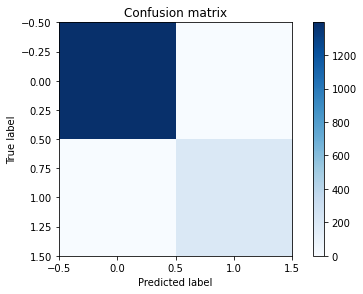

In [118]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

We see from this confusion matrix that our model does quite well in predicting if an anime will break into the top 1000 ranks. We only get 1 false negative, however we do notice that the labels are a little biased. This might motivate the need to downsample the negative samples. \\

Below we plot a normalized version of the confusion matrix

Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


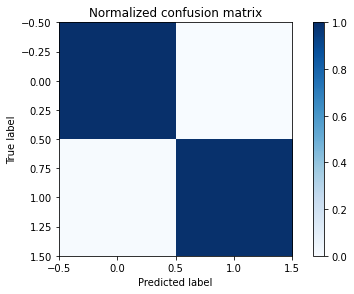

In [119]:
# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

#### Multi-label

Let's try to see how the model does if we switch to a more fine-grained labeling instead of a simple binary label

In [0]:
tmp = anime_numeric['rank']
rank_label_m = []
for i in tmp:
  if i < 1000:
    rank_label_m.append(1)
  elif i >= 1000 and i < 3000:
    rank_label_m.append(2)
  elif i >= 3000 and i < 5000:
    rank_label_m.append(3)
  else:
    rank_label_m.append(4)
rank_features_m = anime_numeric.drop(labels=['rank'], axis='columns')

In [0]:
x_train, x_test, y_train, y_test = train_test_split(rank_features_m, rank_label_m, test_size=0.20)

In [60]:
rank_model_m = RandomForestRegressor()
rank_model_m.fit(x_train, y_train)


y_pred_train = rank_model_m.predict(x_train)
y_pred = rank_model_m.predict(x_test)
y_pred = [round(i) for i in y_pred]

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred)

print(mse_train)
print(mse_test)

0.00031692956426675005
0.004996876951905059


In [61]:
print(accuracy_score(y_train, np.rint(y_pred_train)))
print(accuracy_score(y_test, np.rint(y_pred)))

1.0
0.9950031230480949


It still performs exceedingly well!

Confusion matrix, without normalization
[[185   2   0   0]
 [  2 373   0   0]
 [  0   3 328   1]
 [  0   0   0 707]]


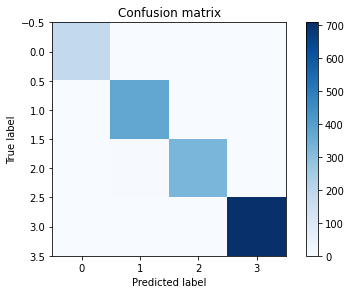

In [64]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)

We see slightly more errors but we see that they're just one off the diagonal, which means our model is only sometimes confused with neighbouring categories, which is acceptable since we are trying to discretize continuous data.

## Dimensionality Reduction (Gender Model)

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Let's see if we can use PCA to find the most significant components for the Gender prediction model

In [0]:
features_n = StandardScaler().fit_transform(gender_features)
pca = PCA(n_components=5)
pca_result = pca.fit_transform(features_n)

In [124]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.27971506 0.0646255  0.04404424 0.04004663 0.03531088]


Looks like the first component explains a large portion of the variance, and the remaining components all share weight quite evenly. Let's plot the first two pca features.

In [0]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(features_n.shape[0])
idxperm = gender_features.index

In [0]:
gender_features['pca-one'] = pca_result[:,0]
gender_features['pca-two'] = pca_result[:,1] 
gender_features['pca-three'] = pca_result[:,2]
gender_features['gender'] = gender_label

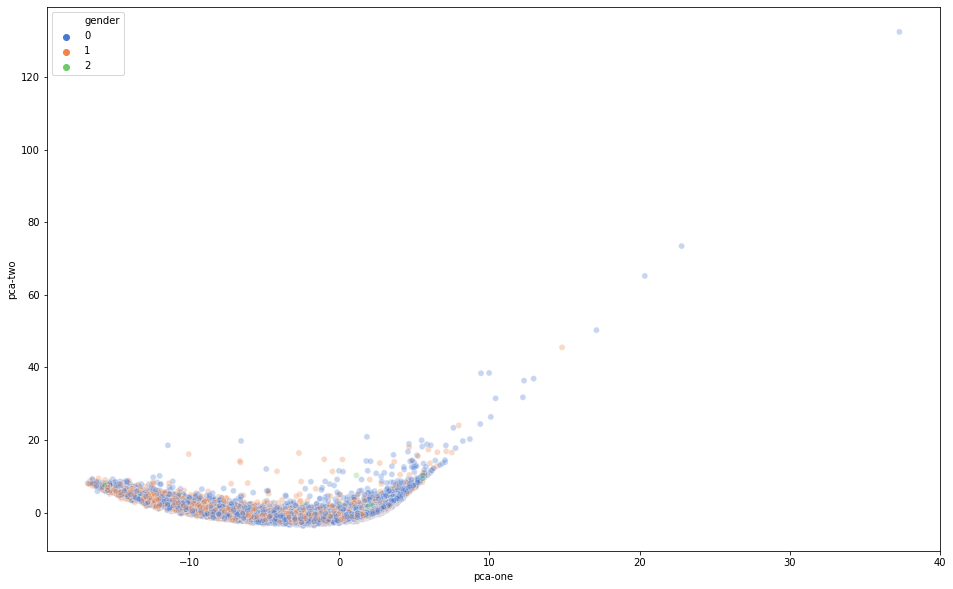

In [152]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="gender",
    palette=sns.color_palette("muted", 3),
    data=gender_features,
    legend="full",
    alpha=0.3
)

That's quite an interesting graph. We see that the datapoints are spread out over values of -20 to 0 on the x-axis in a large cluster that has a slight parabolic shape. As the points go toward 10 on the x-axis, they start to curve steeply upward and the few points beyond seem to be on a linear relationship. \\
It's hard to make out clear trends since the data is so closely clustered, but it does seem like at higher values of pca-one the points are largely of label 0 (dark blue), and the points of label 1 (orange) are clustered towards more negative values of pca-one.

## Dimensionality Reduction (Rank Model)

In [0]:
features_n = StandardScaler().fit_transform(rank_features)
pca = PCA(n_components=5)
pca_result = pca.fit_transform(features_n)

In [45]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.62094595 0.15940195 0.13230197 0.0550943  0.0215481 ]


We see from this that more than half the variance is explained by the first component and the next two components account for over 25% of the variance. \\

Now let's try to plot the first few components and see what we can get

In [0]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(features_n.shape[0])
idxperm = rank_features.index

In [0]:
rank_features['pca-one'] = pca_result[:,0]
rank_features['pca-two'] = pca_result[:,1] 
rank_features['pca-three'] = pca_result[:,2]
rank_features['rank'] = rank_label

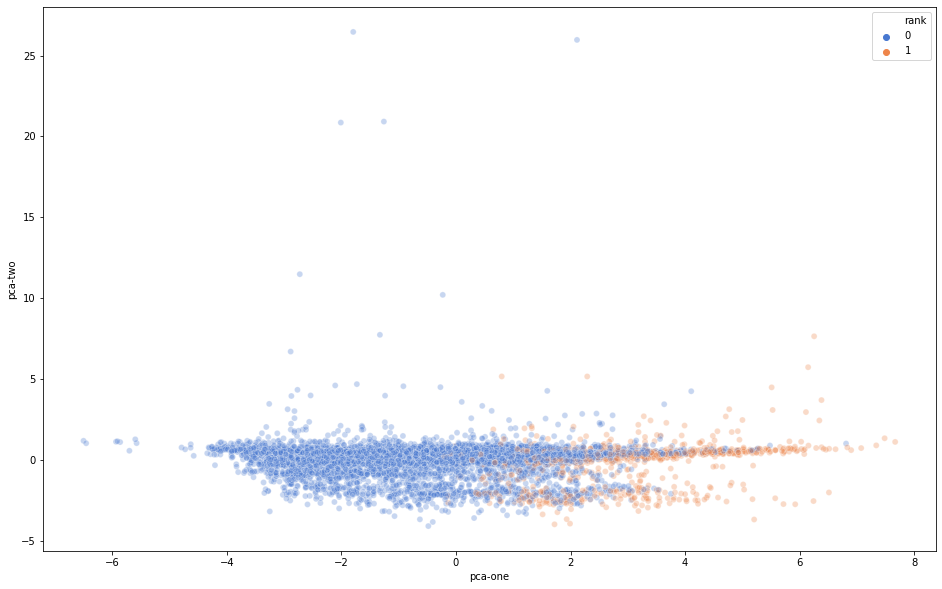

In [51]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="rank",
    palette=sns.color_palette("muted", 2),
    data=rank_features,
    legend="full",
    alpha=0.3
)

Wow, there is quite a clear difference in the values of pca-one for high ranking and low ranking anime. We see that the high ranking anime are clearly focused at the higher values of pca-one while the lower ranking anime are clustered at lower values. \\

There is some overlap in the center and this may be due to the continuous nature of the ranking scale. \\

Another experiment to do with this could be trying to make our model multilabel and seeing if we can distinguish between multiple categories like 'best', 'mediocre', 'passable' and 'terrible'.

In [0]:
features_n = StandardScaler().fit_transform(rank_features_m)
pca = PCA(n_components=5)
pca_result = pca.fit_transform(features_n)

In [66]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.62 0.16 0.13 0.06 0.02]


In [0]:
np.random.seed(42)
rndperm = np.random.permutation(features_n.shape[0])
idxperm = rank_features_m.index

In [0]:
rank_features_m['pca-one'] = pca_result[:,0]
rank_features_m['pca-two'] = pca_result[:,1] 
rank_features_m['pca-three'] = pca_result[:,2]
rank_features_m['rank'] = rank_label_m

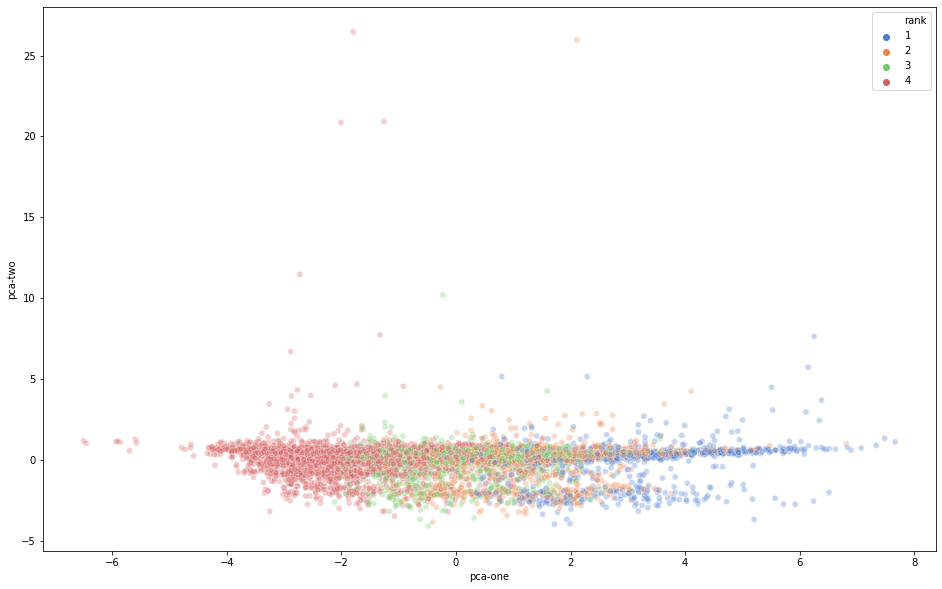

In [70]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="rank",
    palette=sns.color_palette("muted", 4),
    data=rank_features_m,
    legend="full",
    alpha=0.3
)

Looking at this multi-label plot, we see the same pattern as before but now the distinction is even more clear. The high ranking (blue) anime are clearly on the right and the lowest ranking anime (red) are clearly on the left, with the mediocre (green and orange) between them.

## KMeans User Clustering

In [0]:
from sklearn.cluster import KMeans

Let's try to group users into clusters to see if there are identifiable groups on anime viewers

In [0]:
user_values = user_feat.iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(user_values)
    inertia.append(algorithm.inertia_)

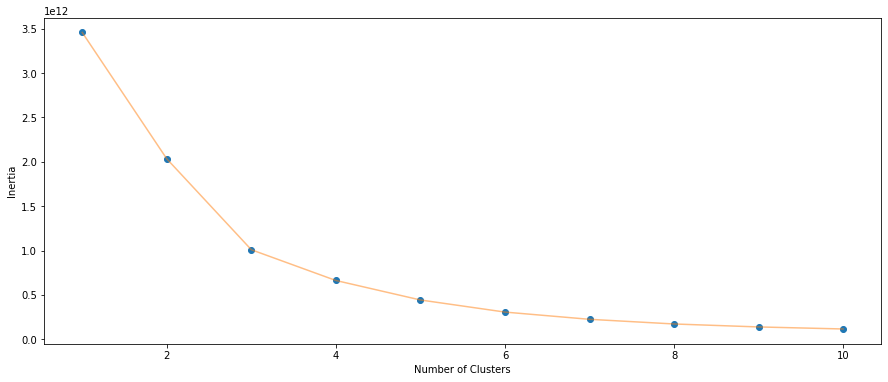

In [48]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

Looks like 3 or 4 clusters will do the trick

In [0]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(user_values)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [99]:
centroids1.shape

(3, 48)

**Conclusions** \\
This shows that using all the features of the user vectors, anime viewers can be categorized into 3 general clusters. 

Since the data is 48-dimensional, it is rather hard to plot on a 2 or 3 dimensional plot without doing further dimensinality reduction like PCA or t-SNE. 

## **Did not work** Get User genres

Now let's try to group users based on the genres of anime they have watched which they rated highly. We will consider a rating higher than 6 as a positive rating. Hopefully we can find some groups of user demographics



In [0]:
user_dicts = []
users_lists = users_df[['username']].merge(lists_df[['username','anime_id', 'my_score']], on='username')
users_genres = users_lists[users_lists['my_score'] > 6].merge(genre_df, on='anime_id')
print("Done with initial merges")
with open(path+'/genres.csv', mode='w') as f:
  for i, row in users_df.iterrows():
    user_list = users_genres[users_genres['username'] == row['username']]
    genre_list = list(user_list['genre'])
    d = {genre:1 for genre in genre_list}
    if bool(d):
      # print(d)
      for key in d:
        f.write(key+',')
      f.write('\n')
      user_dicts.append(d)
    if i % 500 == 0:
      print("Done with {} operations".format(i))

Done with initial merges
Done with 0 operations
Done with 500 operations


KeyboardInterrupt: ignored

Now let's try to turn these dicts into scikit sparse vectors and perform Dimensionality Reduction on it. Since Scikit PCA does not support sparse vectors, we will use TruncatedSVD instead

In [0]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.decomposition import PCA

dv = DictVectorizer()
X = dv.fit_transform(user_dicts)

We 

In [0]:
pca = TruncatedSVD(n_components=40)
pca.fit(X)
print(pca.explained_variance_ratio_)


TypeError: ignored

In [0]:
with open(path+'/genres.csv', mode='w') as f:
  for d in user_dicts:
    for key in d:
      f.write(key+',')
    f.write('\n')


# Challenges Faced

**Initial Stages** \\
In the initial stages, the biggest challenge was finding interesting avenues for exploring the data and picking useful systems to analyze or model. \\

This led to extensive EDA, which helped me see several avenues that I could explore for interesting applications. I decided to pursue 3-4 of these that seemed interesting and/or useful. \\

**Feature Generation** \\
The largest problem during feature generation was finding a good scalable way to generate the user_genres features. \\

The process  for generating these features was somewhat convoluted since the user table had to be joined with their anime list and then we had to filter out anime that the users had rated highly, after which we had to join the result with the anime table to obtain a genres of those anime and finally we had to link these genres to the users. \\

Since this process involved joining the large tables in our dataset, it was impossible to do in Colab using Pandas (see Section "Did not work: User Genres"). As a result, I tried porting everything to an AWS Spark EMR cluster. This approach also had technical challenges in the form of library and dependency management on the cluster. \\

As a third approach, I tried running spark locally on Colab and this was finally successful in generating the user_genres features with ease.

**Machine Learning** \\
The major challenge with this part was Generating the Train and Test examples from the feature vectors. Not only was this process extremely time consuming, the Numpy arrays were too large to be held in memory for the full dataset even on the 25 GB RAM Colab machine. \\

I tried several reductions in size going down from 35 Million in the full anime list set to about 1 Million, which barely fit in memory. But with this, the machine would crash once we started training models since they also needed significant memory. \\

As a result the final size of the feature and label set was ~500,000 train samples and ~100,000 test samples. \\

**Neural Nets**
One of the challenges when working with MxNet neural nets initially was trying to get my feature and label numpy arrays into the dataloader format. This process was quite challenging and after several attempts with different approaches, I still kept running into errors. \\

To remedy this, I decided to instead try a different NN library (PyTorch), and this ended up working quite well.


# Future Directions

There are many possible extensions to this project and they come from various different aspects of the project. Below I will list a few of these. \\

**Scalability** \\
One great extension to this would be to find a way to generate the entire feature set (35 Million records) from the Anime list data for model training. To achieve this, one would probably have to put the data on a cloud storage platform like AWS S3 and develop some sort of streaming solution for procesing the data so that the records could be read in batches, and the stream processor (like Apache Storm) could generate features for them and write them back to a file in S3. \\

**Modelling** \\
In terms of modelling, there are certainly improvements that can be made to the Score prediction and Recommendation models. \\

For the score prediction model, one could try new approaches to feature generation and perhaps different classifiers to try to get better results. More EDA exploring how a user's score is related to other features might also help. \\

For the recommendation model, it could be made more complex by incorporating many more factors into the recommendation. For example, the system could also use the Popularity or Rank of an anime to select which anime to recommend from the short-list. Additionally, we could use user-vector similarities and compare their watchlists to recommend anime watched by similar users. \\
This is where our KMeans User clustering could help as we could first separate the users using the clusters as labels, and then use that to focus the recommendations further.

**Visualization** \\
Another extension could be to produce more visualizations of the results and the features themselves to find interesting patterns or dependencies. These could be used to then perform Dimensionality reduction and produce more informative feature vectors.

**New Avenues** \\
Of course, there are also completely new avenues to explore with this dataset. There was a lot of information in this dataset that I did not specifically use but could make for interesting analysis. Some questions could be "What are the genre trends in anime over time. Did some genres rise/fall in popularity?"